In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pycountry_convert as pc

In [19]:
df = pd.read_csv('../processed_data/companies_feature_engineering.csv')

In [20]:
df.shape

(196530, 200)

In [21]:
df.columns

Index(['id', 'name', 'normalized_name', 'country_code', 'state_code', 'city',
       'region', 'lat', 'lng', 'status',
       ...
       'region_success_rate', 'geographic_cluster_strength', 'metro_area_flag',
       'metro_area_advantage', 'rural_startup_challenges',
       'state_undercap_concentration', 'state_avg_funding',
       'geographic_opportunity_score', 'state_investment_gap',
       'regional_arbitrage_potential'],
      dtype='object', length=200)

In [22]:
df.head()

,id,name,normalized_name,country_code,state_code,city,region,lat,lng,status,...,region_success_rate,geographic_cluster_strength,metro_area_flag,metro_area_advantage,rural_startup_challenges,state_undercap_concentration,state_avg_funding,geographic_opportunity_score,state_investment_gap,regional_arbitrage_potential
0,c:1,Wetpaint,wetpaint,usa,wa,Seattle,seattle,47.606209,-122.332071,operating,...,0.364422,0.014738,0,0.0,-3.369099e+07,0.637804,8.071090e+06,1.250449e+06,1.960555e+06,7.902322e-08
1,c:10,Flektor,flektor,usa,ca,Culver City,los angeles,34.021122,-118.396467,acquired,...,0.255361,0.036931,0,0.0,6.059013e+06,0.602984,8.354919e+06,1.011039e+06,1.676727e+06,7.217114e-08
2,c:100,There,there,usa,ca,San Mateo,sf bay,37.562992,-122.325525,acquired,...,0.433838,0.092596,0,0.0,6.059013e+06,0.602984,8.354919e+06,1.011039e+06,1.676727e+06,7.217114e-08
3,c:10000,MYWEBBO,mywebbo,unknown,unknown,Unknown,unknown,NaN,NaN,operating,...,0.015402,1.000000,0,0.0,6.059013e+06,0.934203,7.120287e+05,8.706411e+06,9.319617e+06,1.312029e-06
4,c:10001,THE Movie Streamer,the movie streamer,unknown,unknown,Unknown,unknown,NaN,NaN,operating,...,0.015402,1.000000,0,0.0,6.059013e+06,0.934203,7.120287e+05,8.706411e+06,9.319617e+06,1.312029e-06


In [23]:
df['funding_total_usd'].describe()

count    1.965300e+05
mean     2.101438e+06
std      2.603636e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      5.700000e+09
Name: funding_total_usd, dtype: float64

## Distribution of Funding by Geography

### Funding Distribution by Continent

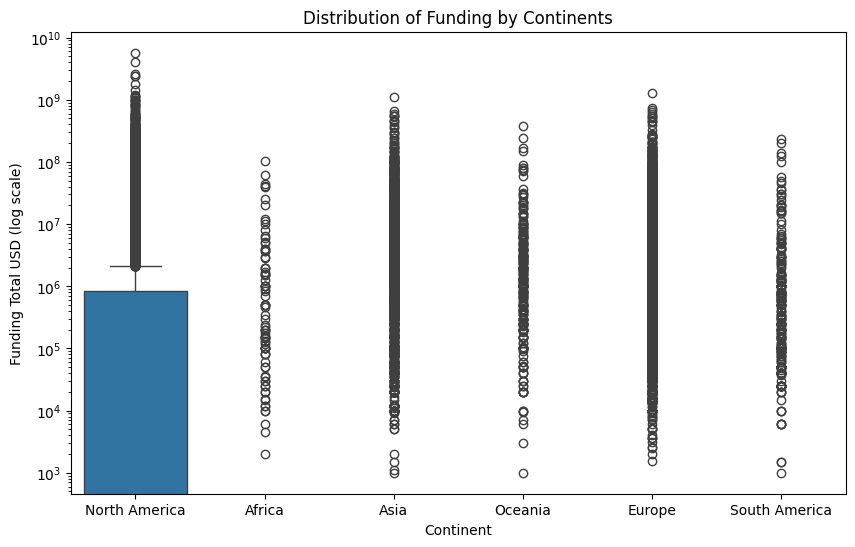

Number of companies per continent:
continent
North America    55669
Europe           19763
Asia              8875
Oceania           1671
South America     1101
Africa             613
Name: count, dtype: int64

Funding statistics by continent:
                 count          mean           std  min  25%  50%       75%  \
continent                                                                     
Africa           613.0  7.288296e+05  5.818571e+06  0.0  0.0  0.0       0.0   
Asia            8875.0  3.103775e+06  2.477294e+07  0.0  0.0  0.0       0.0   
Europe         19763.0  2.466729e+06  1.990812e+07  0.0  0.0  0.0       0.0   
North America  55669.0  5.777260e+06  4.564619e+07  0.0  0.0  0.0  840000.0   
Oceania         1671.0  1.318634e+06  1.338501e+07  0.0  0.0  0.0       0.0   
South America   1101.0  1.370951e+06  1.180658e+07  0.0  0.0  0.0       0.0   

                        max  
continent                    
Africa         1.020000e+08  
Asia           1.100000e+09  
Euro

In [24]:
# show the distribution of funding by country code

def country_to_continent(country_code):
    if pd.isna(country_code):
        return 'NaN'
    
    country_code = str(country_code).upper()

    try:
        country_code_alpha2 = pc.country_alpha3_to_country_alpha2(country_code)
        continent_code = pc.country_alpha2_to_continent_code(country_code_alpha2)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except:
        return 'Unknown'

df['continent'] = df['country_code'].apply(country_to_continent)

df_valid_continents = df[(df['continent'] != 'NaN') & (df['continent'] != 'Unknown')]

plt.figure(figsize=(10,6))
sns.boxplot(data=df_valid_continents, x='continent', y='funding_total_usd')
plt.yscale('log')
plt.title('Distribution of Funding by Continents')
plt.xlabel('Continent')
plt.ylabel('Funding Total USD (log scale)')
plt.show()

# Show summary statistics
print("Number of companies per continent:")
print(df_valid_continents['continent'].value_counts())
print("\nFunding statistics by continent:")
print(df_valid_continents.groupby('continent')['funding_total_usd'].describe())

### Funding Distribution by Country Within Each Continent

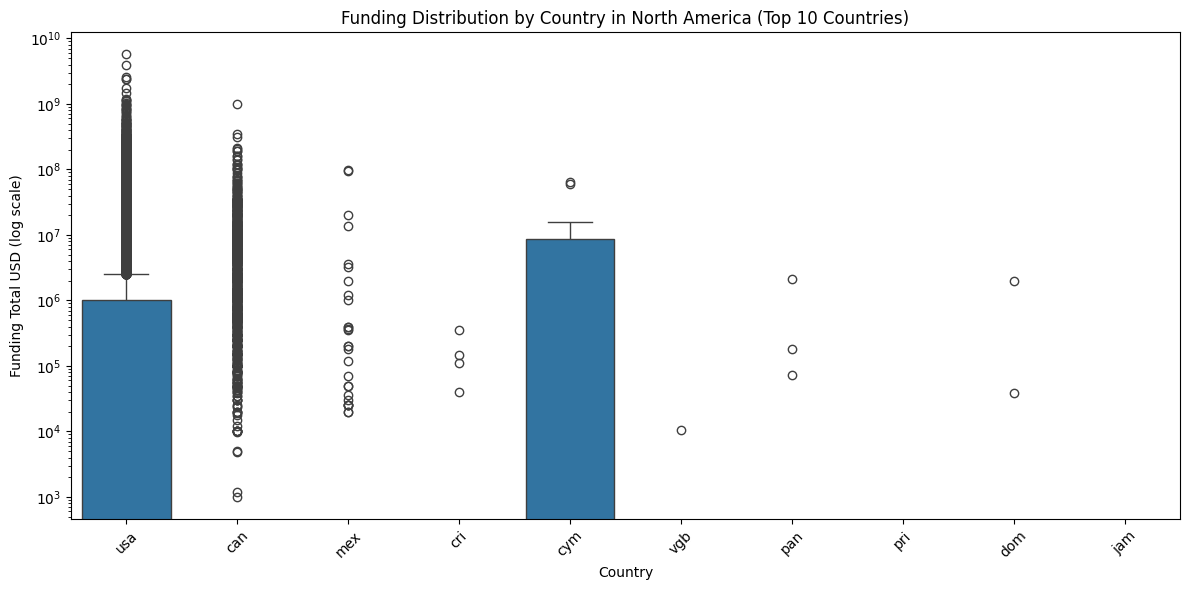


=== North America Statistics ===
Number of companies per country (top 10):
country_code
usa    51635
can     3728
mex      144
cri       27
pri       19
pan       19
cym       15
dom       13
vgb       11
jam        8
Name: count, dtype: int64

Funding statistics by country in North America:
                count          mean           std  min  25%  50%        75%  \
country_code                                                                  
can            3728.0  2.646556e+06  2.141766e+07  0.0  0.0  0.0        0.0   
cri              27.0  2.403704e+04  7.407194e+04  0.0  0.0  0.0        0.0   
cym              15.0  1.064467e+07  2.161866e+07  0.0  0.0  0.0  8625000.0   
dom              13.0  1.568178e+05  5.539103e+05  0.0  0.0  0.0        0.0   
jam               8.0  0.000000e+00  0.000000e+00  0.0  0.0  0.0        0.0   
mex             144.0  1.667900e+06  1.146498e+07  0.0  0.0  0.0        0.0   
pan              19.0  1.238421e+05  4.805280e+05  0.0  0.0  0.0        0.

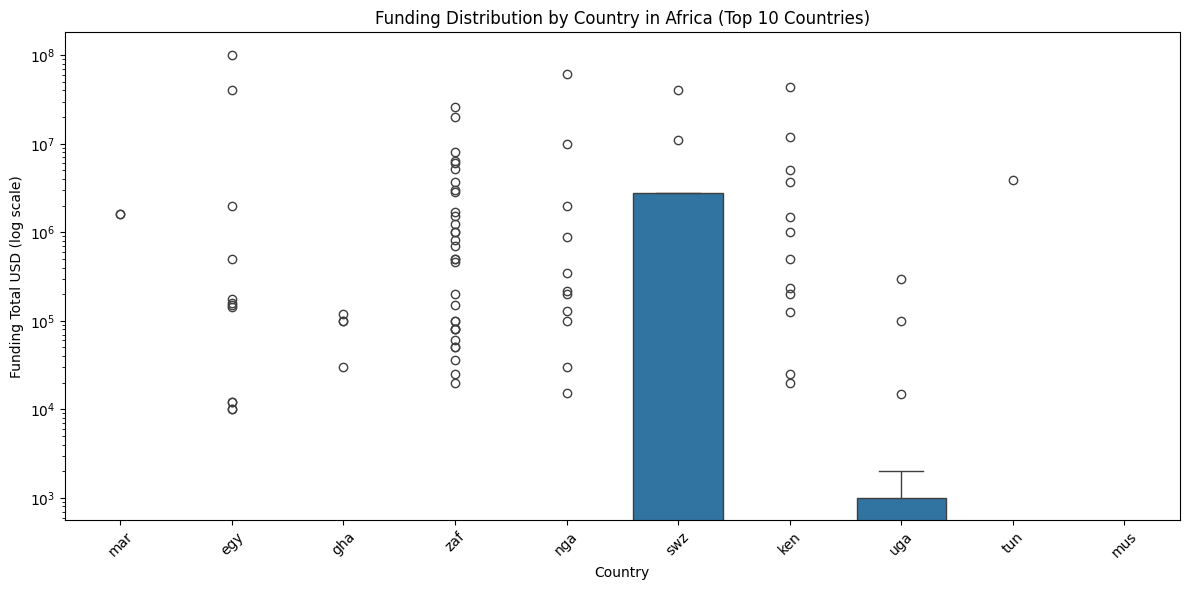


=== Africa Statistics ===
Number of companies per country (top 10):
country_code
zaf    277
nga     78
egy     72
ken     50
gha     30
mar     18
uga     15
mus     12
tun      9
swz      8
Name: count, dtype: int64

Funding statistics by country in Africa:
              count          mean           std  min  25%  50%        75%  \
country_code                                                                
egy            72.0  2.027847e+06  1.288047e+07  0.0  0.0  0.0        0.0   
gha            30.0  1.165387e+04  3.276542e+04  0.0  0.0  0.0        0.0   
ken            50.0  1.362598e+06  6.413160e+06  0.0  0.0  0.0        0.0   
mar            18.0  1.777778e+05  5.174093e+05  0.0  0.0  0.0        0.0   
mus            12.0  0.000000e+00  0.000000e+00  0.0  0.0  0.0        0.0   
nga            78.0  9.607944e+05  6.982389e+06  0.0  0.0  0.0        0.0   
swz             8.0  6.392625e+06  1.412797e+07  0.0  0.0  0.0  2785250.0   
tun             9.0  4.355556e+05  1.306667e+06

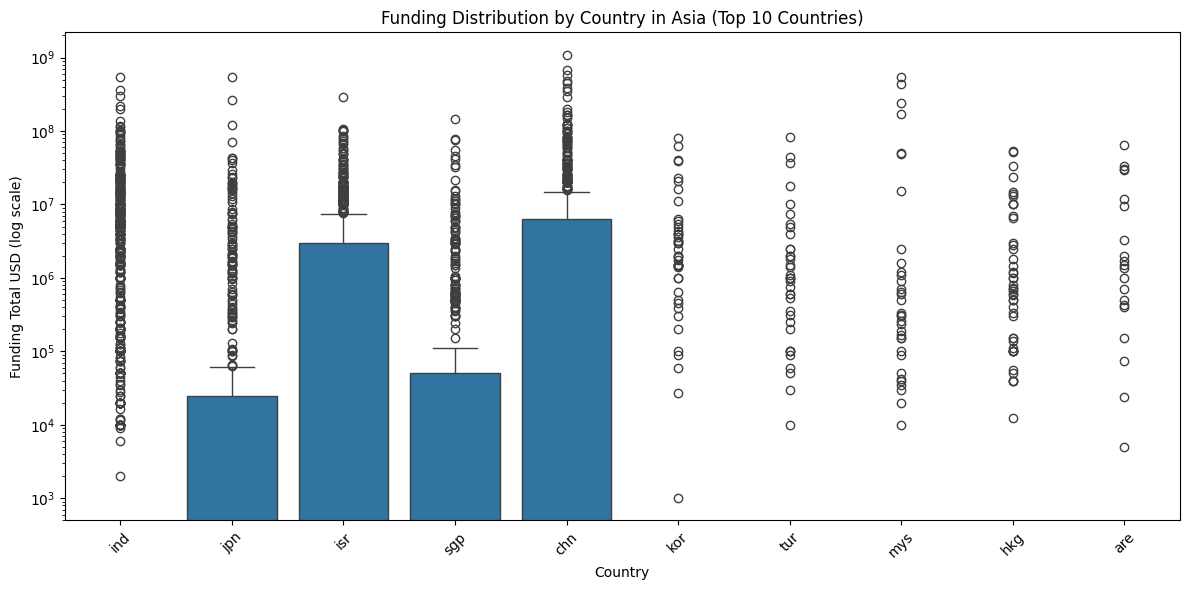


=== Asia Statistics ===
Number of companies per country (top 10):
country_code
ind    3924
isr    1042
chn     732
sgp     516
jpn     470
tur     354
hkg     267
kor     194
are     181
mys     149
Name: count, dtype: int64

Funding statistics by country in Asia:
               count          mean           std  min  25%  50%        75%  \
country_code                                                                 
are            181.0  1.063565e+06  6.304963e+06  0.0  0.0  0.0        0.0   
chn            732.0  1.460347e+07  6.514696e+07  0.0  0.0  0.0  6305750.5   
hkg            267.0  1.016485e+06  5.477924e+06  0.0  0.0  0.0        0.0   
ind           3924.0  1.565089e+06  1.432662e+07  0.0  0.0  0.0        0.0   
isr           1042.0  4.299512e+06  1.444785e+07  0.0  0.0  0.0  3000000.0   
jpn            470.0  3.452392e+06  2.881311e+07  0.0  0.0  0.0    24750.0   
kor            194.0  1.919136e+06  8.648162e+06  0.0  0.0  0.0        0.0   
mys            149.0  1.023061e+

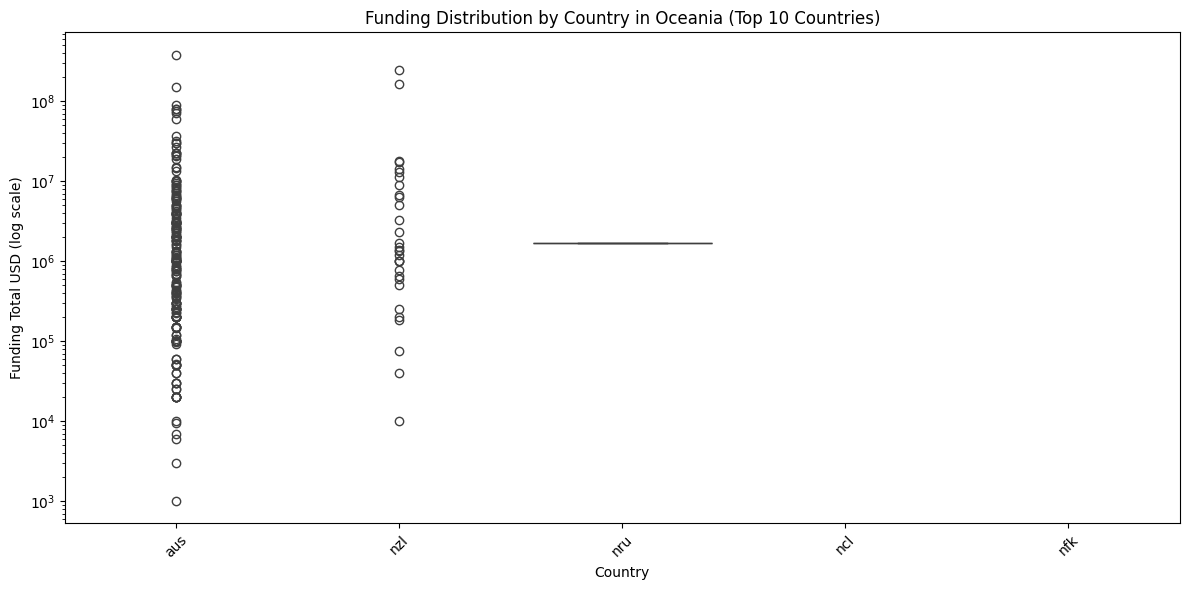


=== Oceania Statistics ===
Number of companies per country (top 10):
country_code
aus    1455
nzl     213
nru       1
ncl       1
nfk       1
Name: count, dtype: int64

Funding statistics by country in Oceania:
               count          mean           std        min        25%  \
country_code                                                             
aus           1455.0  1.149424e+06  1.207400e+07        0.0        0.0   
ncl              1.0  0.000000e+00           NaN        0.0        0.0   
nfk              1.0  0.000000e+00           NaN        0.0        0.0   
nru              1.0  1.672580e+06           NaN  1672580.0  1672580.0   
nzl            213.0  2.485227e+06  2.024532e+07        0.0        0.0   

                    50%        75%          max  
country_code                                     
aus                 0.0        0.0  382106890.0  
ncl                 0.0        0.0          0.0  
nfk                 0.0        0.0          0.0  
nru           16725

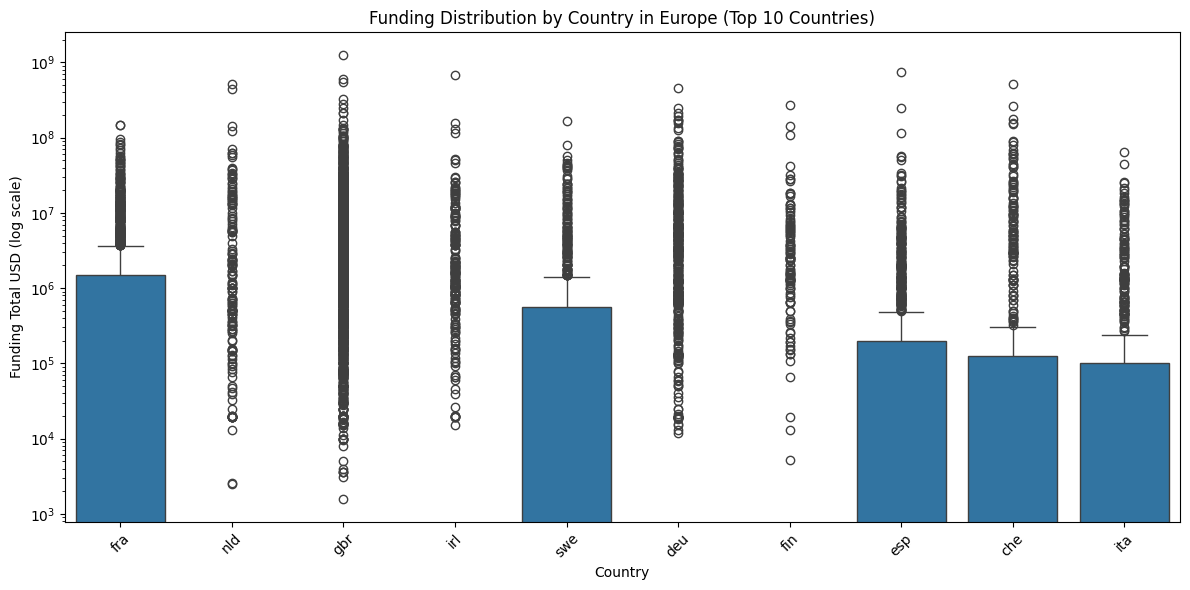


=== Europe Statistics ===
Number of companies per country (top 10):
country_code
gbr    7372
deu    1918
fra    1652
esp    1100
irl    1077
nld     866
swe     704
ita     626
fin     578
che     515
Name: count, dtype: int64

Funding statistics by country in Europe:
               count          mean           std  min  25%  50%        75%  \
country_code                                                                 
che            515.0  5.493695e+06  3.001043e+07  0.0  0.0  0.0   125000.0   
deu           1918.0  3.006118e+06  1.790257e+07  0.0  0.0  0.0        0.0   
esp           1100.0  1.943032e+06  2.419551e+07  0.0  0.0  0.0   200000.0   
fin            578.0  1.819923e+06  1.397288e+07  0.0  0.0  0.0        0.0   
fra           1652.0  2.781560e+06  9.476446e+06  0.0  0.0  0.0  1482500.0   
gbr           7372.0  2.401739e+06  2.078463e+07  0.0  0.0  0.0        0.0   
irl           1077.0  1.931911e+06  2.230711e+07  0.0  0.0  0.0        0.0   
ita            626.0  9.9812

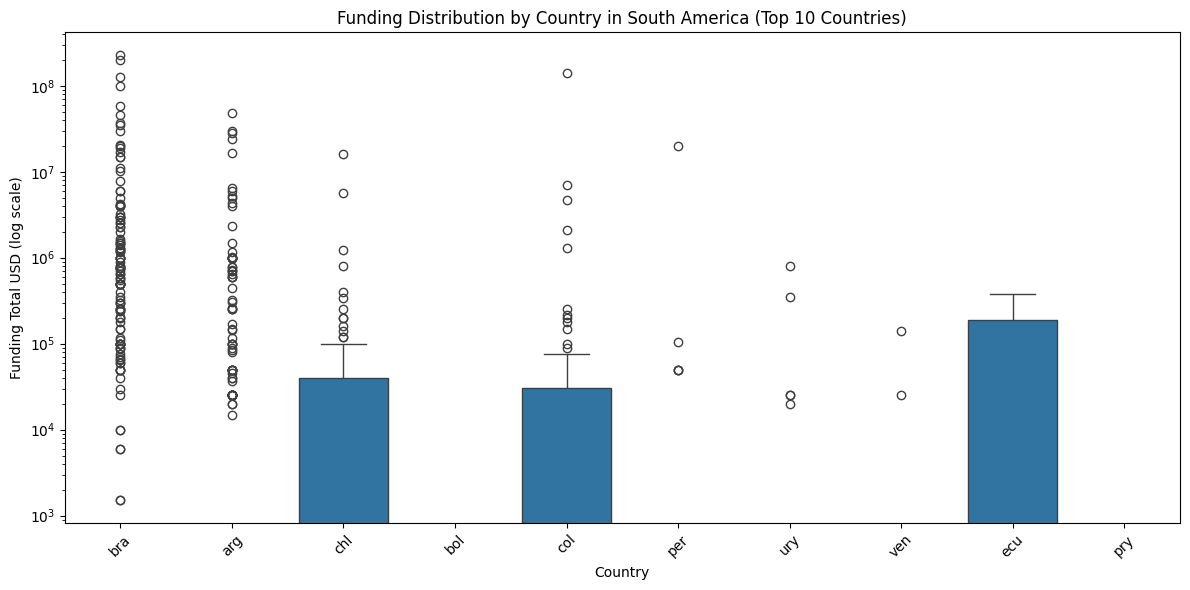


=== South America Statistics ===
Number of companies per country (top 10):
country_code
bra    536
arg    320
chl     96
col     62
ury     39
per     22
ven     16
bol      3
ecu      3
pry      3
Name: count, dtype: int64

Funding statistics by country in South America:
              count          mean           std  min  25%  50%       75%  \
country_code                                                               
arg           320.0  6.267891e+05  3.945539e+06  0.0  0.0  0.0       0.0   
bol             3.0  0.000000e+00  0.000000e+00  0.0  0.0  0.0       0.0   
bra           536.0  2.058963e+06  1.544794e+07  0.0  0.0  0.0       0.0   
chl            96.0  2.783542e+05  1.724842e+06  0.0  0.0  0.0   40000.0   
col            62.0  2.524185e+06  1.777934e+07  0.0  0.0  0.0   30250.0   
ecu             3.0  1.262710e+05  2.187078e+05  0.0  0.0  0.0  189406.5   
per            22.0  9.206818e+05  4.261512e+06  0.0  0.0  0.0       0.0   
pry             3.0  0.000000e+00  0.00000

In [25]:
for cont in df_valid_continents['continent'].unique():
    df_cont = df_valid_continents[df_valid_continents['continent'] == cont]
    
    top_countries = df_cont['country_code'].value_counts().head(10).index
    df_cont_top = df_cont[df_cont['country_code'].isin(top_countries)]
    
    plt.figure(figsize=(12,6))
    sns.boxplot(x='country_code', y='funding_total_usd', data=df_cont_top)
    plt.yscale('log')
    plt.title(f'Funding Distribution by Country in {cont} (Top 10 Countries)')
    plt.xlabel('Country')
    plt.ylabel('Funding Total USD (log scale)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Show summary statistics for this continent
    print(f"\n=== {cont} Statistics ===")
    print(f"Number of companies per country (top 10):")
    print(df_cont_top['country_code'].value_counts())
    print(f"\nFunding statistics by country in {cont}:")
    print(df_cont_top.groupby('country_code')['funding_total_usd'].describe())

### Funding Distribution Within Each US Region

Regions Used - Northeast, Midwest, South, West

In [26]:
state_to_region = {
    # Northeast
    'CT':'Northeast','ME':'Northeast','MA':'Northeast','NH':'Northeast',
    'RI':'Northeast','VT':'Northeast','NJ':'Northeast','NY':'Northeast','PA':'Northeast',
    # Midwest
    'IN':'Midwest','IL':'Midwest','MI':'Midwest','OH':'Midwest','WI':'Midwest',
    'IA':'Midwest','KS':'Midwest','MN':'Midwest','MO':'Midwest','NE':'Midwest','ND':'Midwest','SD':'Midwest',
    # South
    'DE':'South','FL':'South','GA':'South','MD':'South','NC':'South','SC':'South','VA':'South','DC':'South','WV':'South',
    'AL':'South','KY':'South','MS':'South','TN':'South','AR':'South','LA':'South','OK':'South','TX':'South',
    # West
    'AZ':'West','CO':'West','ID':'West','MT':'West','NV':'West','NM':'West','UT':'West','WY':'West',
    'AK':'West','CA':'West','HI':'West','OR':'West','WA':'West'
}

df['us_region'] = df['state_code'].map(state_to_region)
df['us_region'].value_counts()

Series([], Name: count, dtype: int64)

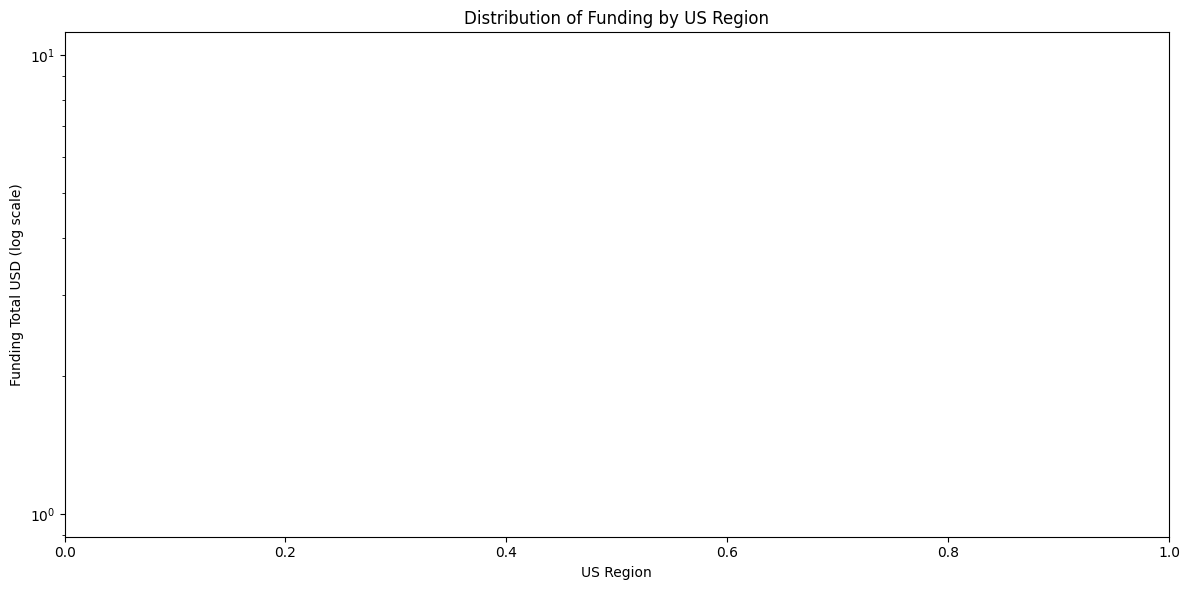

Number of companies per US region:
Series([], Name: count, dtype: int64)

Funding statistics by region:
Empty DataFrame
Columns: [count, mean, std, min, 25%, 50%, 75%, max]
Index: []


In [27]:
# Visualize funding distribution by US region
df_us_regions = df[(df['country_code'] == 'USA') & (df['us_region'].notna())]

plt.figure(figsize=(12,6))
sns.boxplot(data=df_us_regions, x='us_region', y='funding_total_usd')
plt.yscale('log')
plt.title('Distribution of Funding by US Region')
plt.xlabel('US Region')
plt.ylabel('Funding Total USD (log scale)')
plt.tight_layout()
plt.show()

# Show summary statistics
print("Number of companies per US region:")
print(df_us_regions['us_region'].value_counts())
print("\nFunding statistics by region:")
print(df_us_regions.groupby('us_region')['funding_total_usd'].describe())

### Funding Distribution by State Within Each US Region

In [28]:
# Show funding distribution by state within each US region
for region in df_us_regions['us_region'].unique():
    df_region = df_us_regions[df_us_regions['us_region'] == region]
    
    # Get top 10 states by number of companies for readability
    top_states = df_region['state_code'].value_counts().head(10).index
    df_region_top = df_region[df_region['state_code'].isin(top_states)]
    
    if len(df_region_top) > 0:  # Only plot if there's data
        plt.figure(figsize=(14,6))
        sns.boxplot(x='state_code', y='funding_total_usd', data=df_region_top)
        plt.yscale('log')
        plt.title(f'Funding Distribution by State in {region} Region (Top 10 States)')
        plt.xlabel('State Code')
        plt.ylabel('Funding Total USD (log scale)')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        
        # Show summary statistics for this region
        print(f"\n=== {region} Region Statistics ===")
        print(f"Number of companies per state (top 10):")
        print(df_region_top['state_code'].value_counts())
        print(f"\nFunding statistics by state in {region}:")
        print(df_region_top.groupby('state_code')['funding_total_usd'].describe())
        print("-" * 80)

# Distribution of Funding by Industry

Available industry categories:
category_code
other               86972
software            17919
web                 15117
ecommerce            9063
games_video          7520
mobile               6862
advertising          6098
consulting           5005
enterprise           4441
biotech              4430
hardware             2951
education            2901
public_relations     2846
network_hosting      2350
search               2182
cleantech            1940
health               1698
finance              1386
social               1310
security             1171
Name: count, dtype: int64

Total unique categories: 42
Companies with missing category: 0


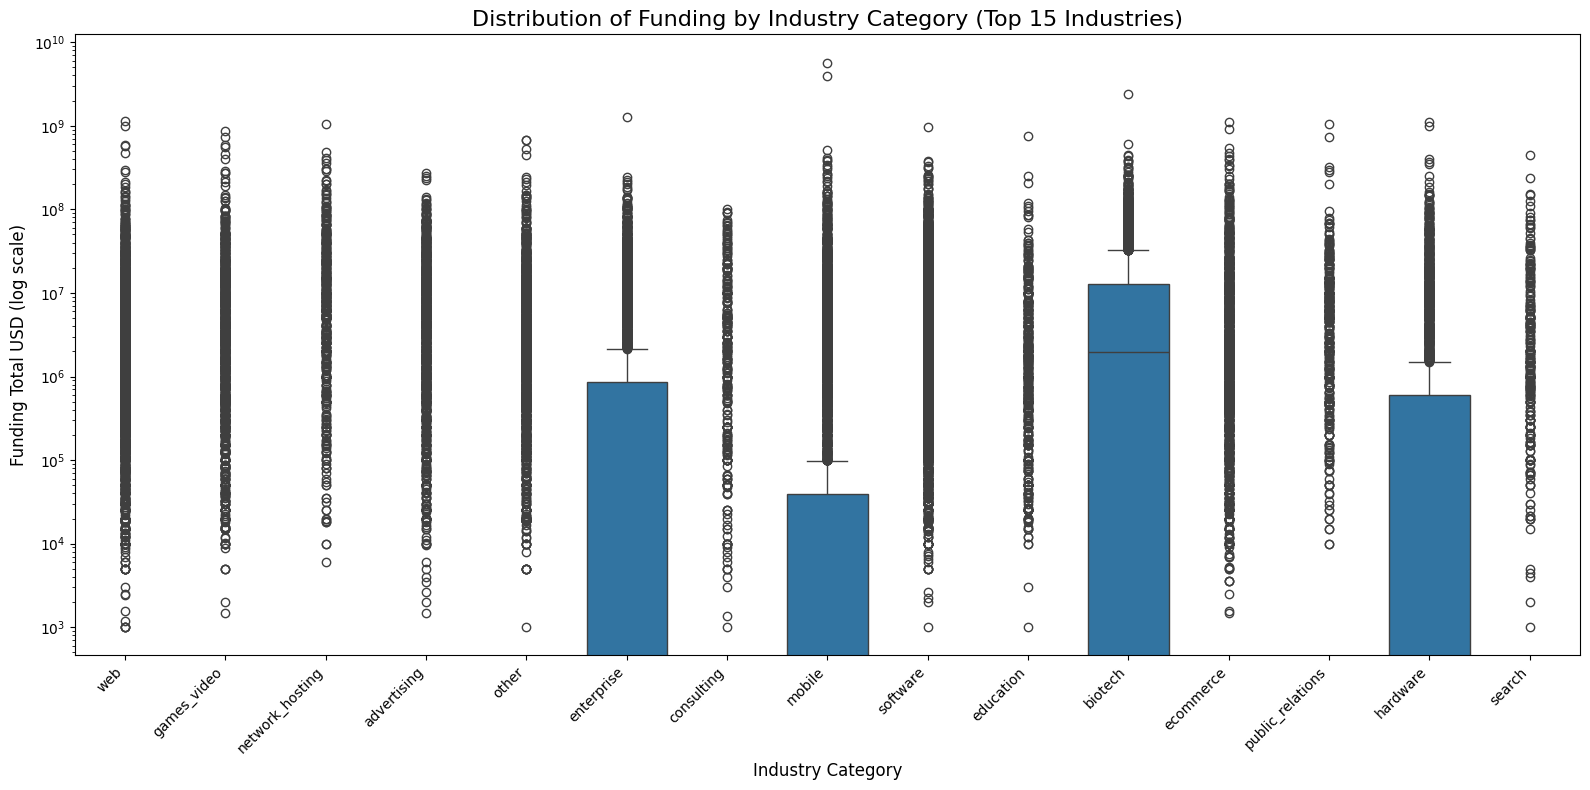


=== Industry Funding Statistics (Top 15) ===
Number of companies per industry:
category_code
other               86972
software            17919
web                 15117
ecommerce            9063
games_video          7520
mobile               6862
advertising          6098
consulting           5005
enterprise           4441
biotech              4430
hardware             2951
education            2901
public_relations     2846
network_hosting      2350
search               2182
Name: count, dtype: int64

Funding statistics by industry:
                    count          mean           std  min  25%        50%  \
category_code                                                                
advertising        6098.0  2.047915e+06  1.095311e+07  0.0  0.0        0.0   
biotech            4430.0  1.509451e+07  4.978335e+07  0.0  0.0  1960175.0   
consulting         5005.0  5.228472e+05  4.629877e+06  0.0  0.0        0.0   
ecommerce          9063.0  1.945068e+06  2.172685e+07  0.0  0.0    

In [29]:
print("Available industry categories:")
print(df['category_code'].value_counts().head(20))
print(f"\nTotal unique categories: {df['category_code'].nunique()}")
print(f"Companies with missing category: {df['category_code'].isnull().sum()}")

df_with_categories = df[df['category_code'].notna()]

top_industries = df_with_categories['category_code'].value_counts().head(15).index
df_top_industries = df_with_categories[df_with_categories['category_code'].isin(top_industries)]

plt.figure(figsize=(16, 8))
sns.boxplot(data=df_top_industries, x='category_code', y='funding_total_usd')
plt.yscale('log')
plt.title('Distribution of Funding by Industry Category (Top 15 Industries)', fontsize=16)
plt.xlabel('Industry Category', fontsize=12)
plt.ylabel('Funding Total USD (log scale)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\n=== Industry Funding Statistics (Top 15) ===")
print("Number of companies per industry:")
print(df_top_industries['category_code'].value_counts())
print("\nFunding statistics by industry:")
print(df_top_industries.groupby('category_code')['funding_total_usd'].describe())

### Risk Based Features

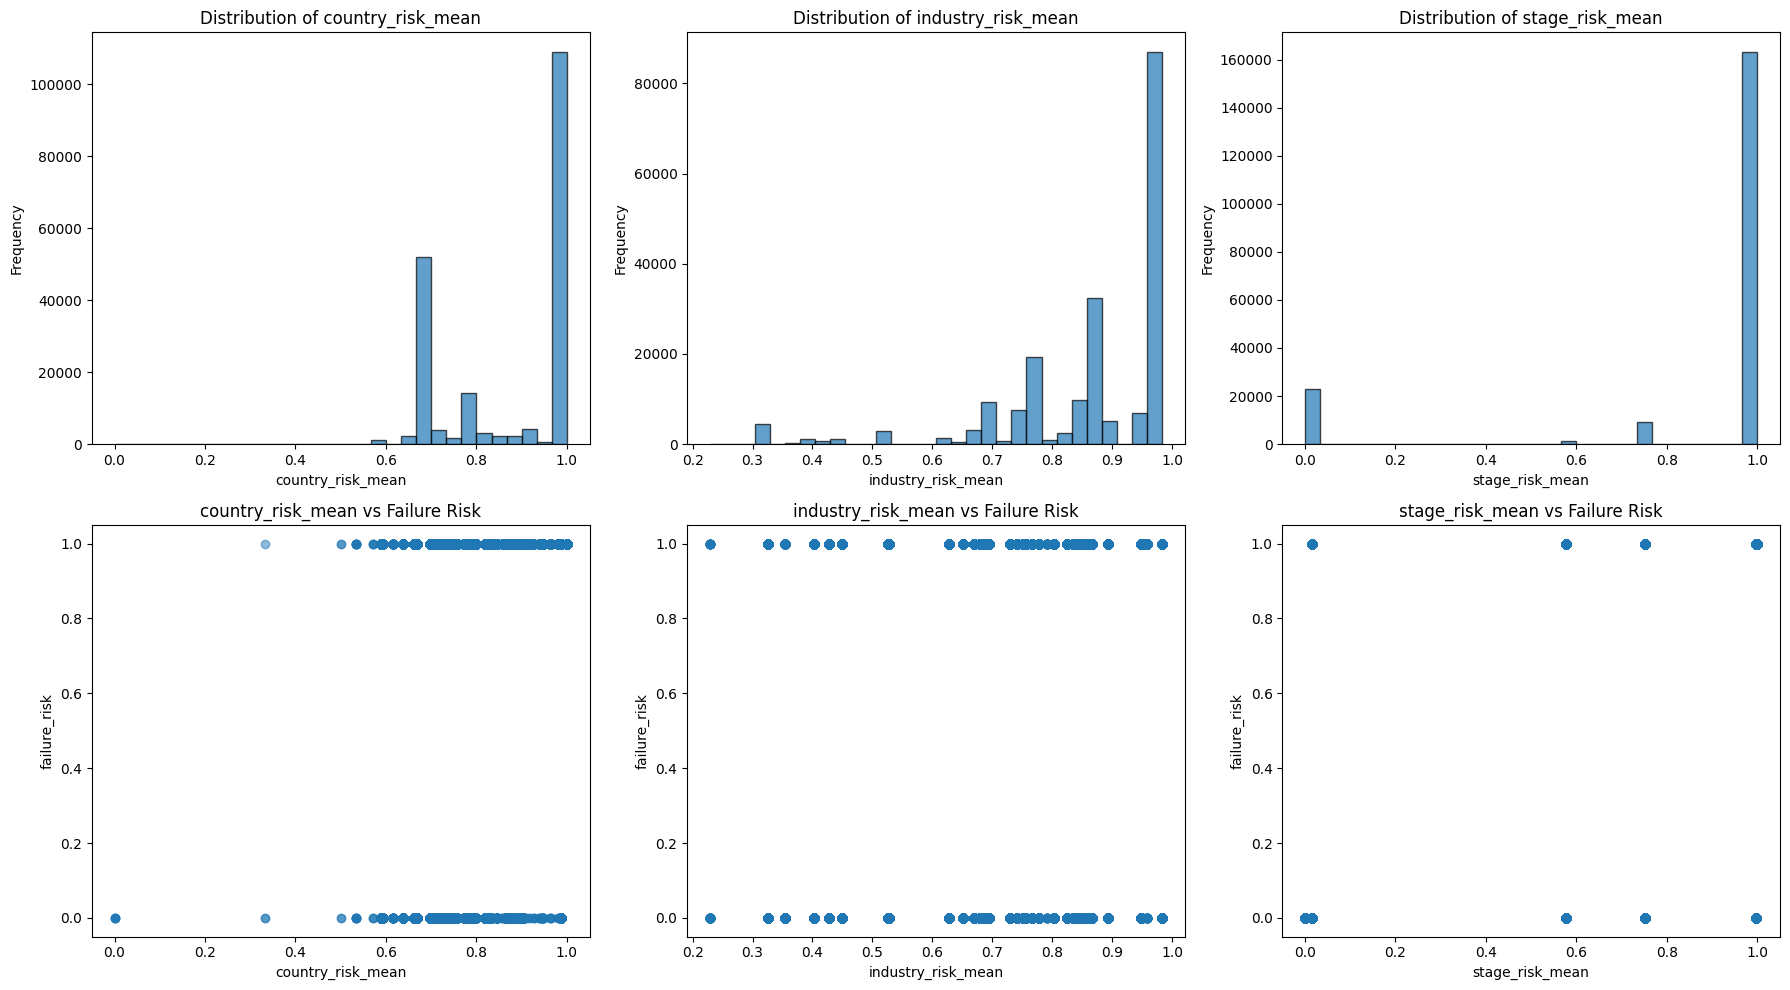

Risk Features Summary:

country_risk_mean:
  Mean: 0.8677
  Std:  0.1435
  Min:  0.0000
  Max:  1.0000
  Corr with failure_risk: 0.4236

industry_risk_mean:
  Mean: 0.8677
  Std:  0.1480
  Min:  0.2286
  Max:  0.9834
  Corr with failure_risk: 0.4368

stage_risk_mean:
  Mean: 0.8677
  Std:  0.3185
  Min:  0.0000
  Max:  1.0000
  Corr with failure_risk: 0.9399


In [30]:
# Analyze risk-based features
risk_features = ['country_risk_mean', 'industry_risk_mean', 'stage_risk_mean']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for i, feature in enumerate(risk_features):
    if feature in df.columns:
        # Distribution plot
        axes[i].hist(df[feature].dropna(), bins=30, alpha=0.7, edgecolor='black')
        axes[i].set_title(f'Distribution of {feature}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Frequency')
        
        # Box plot vs failure_risk
        axes[i+3].scatter(df[feature], df['failure_risk'], alpha=0.5)
        axes[i+3].set_xlabel(feature)
        axes[i+3].set_ylabel('failure_risk')
        axes[i+3].set_title(f'{feature} vs Failure Risk')

plt.tight_layout()
plt.show()

# Summary statistics for risk features
print("Risk Features Summary:")
print("=" * 50)
for feature in risk_features:
    if feature in df.columns:
        print(f"\n{feature}:")
        print(f"  Mean: {df[feature].mean():.4f}")
        print(f"  Std:  {df[feature].std():.4f}")
        print(f"  Min:  {df[feature].min():.4f}")
        print(f"  Max:  {df[feature].max():.4f}")
        print(f"  Corr with failure_risk: {df[feature].corr(df['failure_risk']):.4f}")

## Composite Scores Analysis

In [31]:
df.columns

Index(['id', 'name', 'normalized_name', 'country_code', 'state_code', 'city',
       'region', 'lat', 'lng', 'status',
       ...
       'metro_area_flag', 'metro_area_advantage', 'rural_startup_challenges',
       'state_undercap_concentration', 'state_avg_funding',
       'geographic_opportunity_score', 'state_investment_gap',
       'regional_arbitrage_potential', 'continent', 'us_region'],
      dtype='object', length=202)

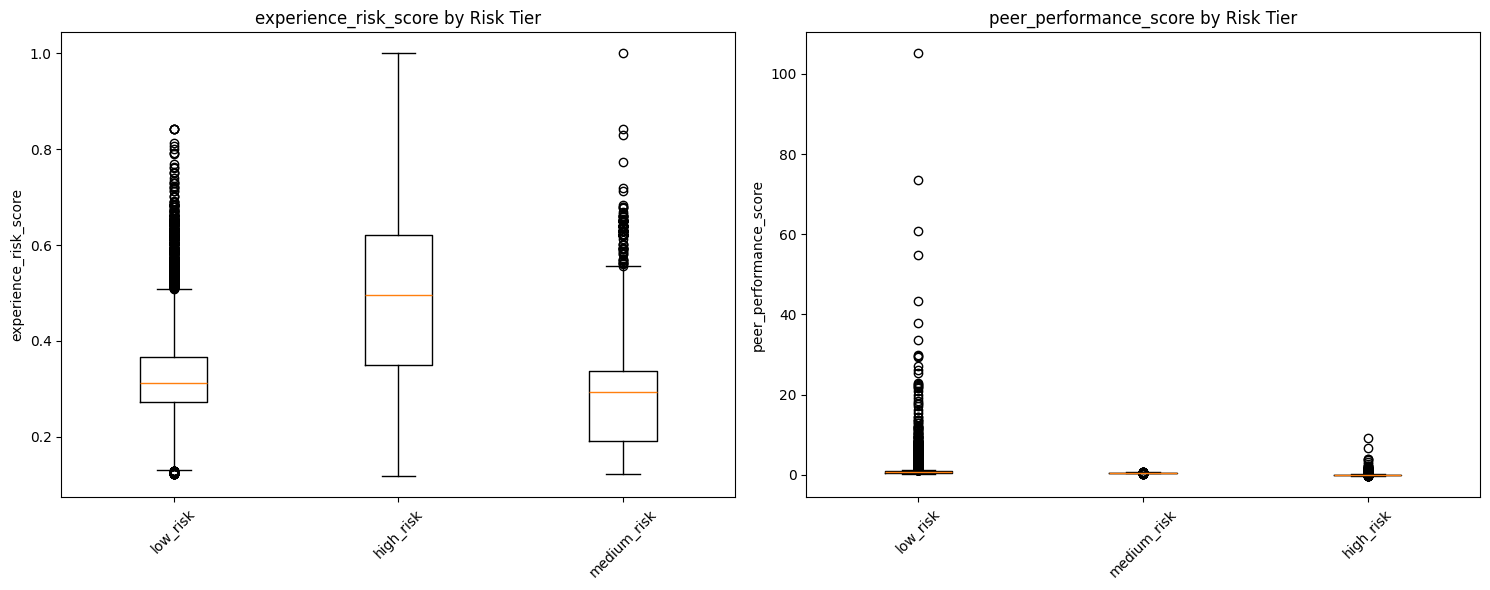

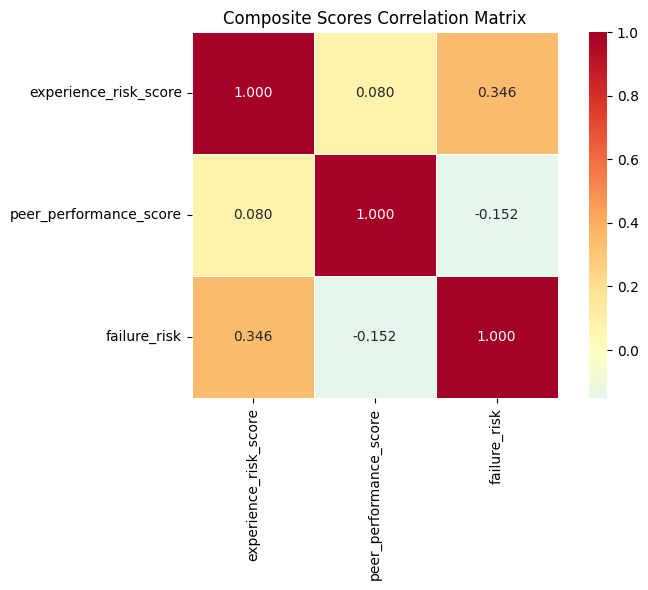

Composite Scores vs Failure Risk:
experience_risk_score    :  0.346
peer_performance_score   : -0.152


In [32]:
# Analyze composite score features
composite_features = ['experience_risk_score', 'peer_performance_score']

available_features = [f for f in composite_features if f in df.columns]

if available_features:
    n_features = len(available_features)
    if n_features == 1:
        fig, ax = plt.subplots(1, 1, figsize=(8, 6))
        axes = [ax]
    else:
        fig, axes = plt.subplots(1, n_features, figsize=(15, 6))
        if n_features == 1:
            axes = [axes]

    for i, feature in enumerate(available_features):
        # Create risk tier bins
        df_plot = df[df[feature].notna() & df['risk_tier_label'].notna()]
        
        if len(df_plot) > 0:
            # Box plot by risk tier
            risk_tiers = df_plot['risk_tier_label'].unique()
            risk_data = [df_plot[df_plot['risk_tier_label'] == tier][feature].values for tier in risk_tiers]
            
            axes[i].boxplot(risk_data, tick_labels=risk_tiers)
            axes[i].set_title(f'{feature} by Risk Tier')
            axes[i].set_ylabel(feature)
            axes[i].tick_params(axis='x', rotation=45)
        else:
            axes[i].text(0.5, 0.5, 'No data available', 
                        horizontalalignment='center', verticalalignment='center',
                        transform=axes[i].transAxes)
            axes[i].set_title(f'{feature} by Risk Tier (No Data)')

    plt.tight_layout()
    plt.show()
else:
    print("No composite score features found in the dataset.")

# Correlation matrix for composite scores
composite_corr = df[composite_features + ['failure_risk']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(composite_corr, annot=True, cmap='RdYlBu_r', center=0, 
            square=True, linewidths=.5, fmt='.3f')
plt.title('Composite Scores Correlation Matrix')
plt.tight_layout()
plt.show()

print("Composite Scores vs Failure Risk:")
print("=" * 40)
for feature in composite_features:
    if feature in df.columns:
        corr = df[feature].corr(df['failure_risk'])
        print(f"{feature:25s}: {corr:6.3f}")

# Correlation Analysis: Features vs Startup Success/Failure

## Numerical Correlation Analysis

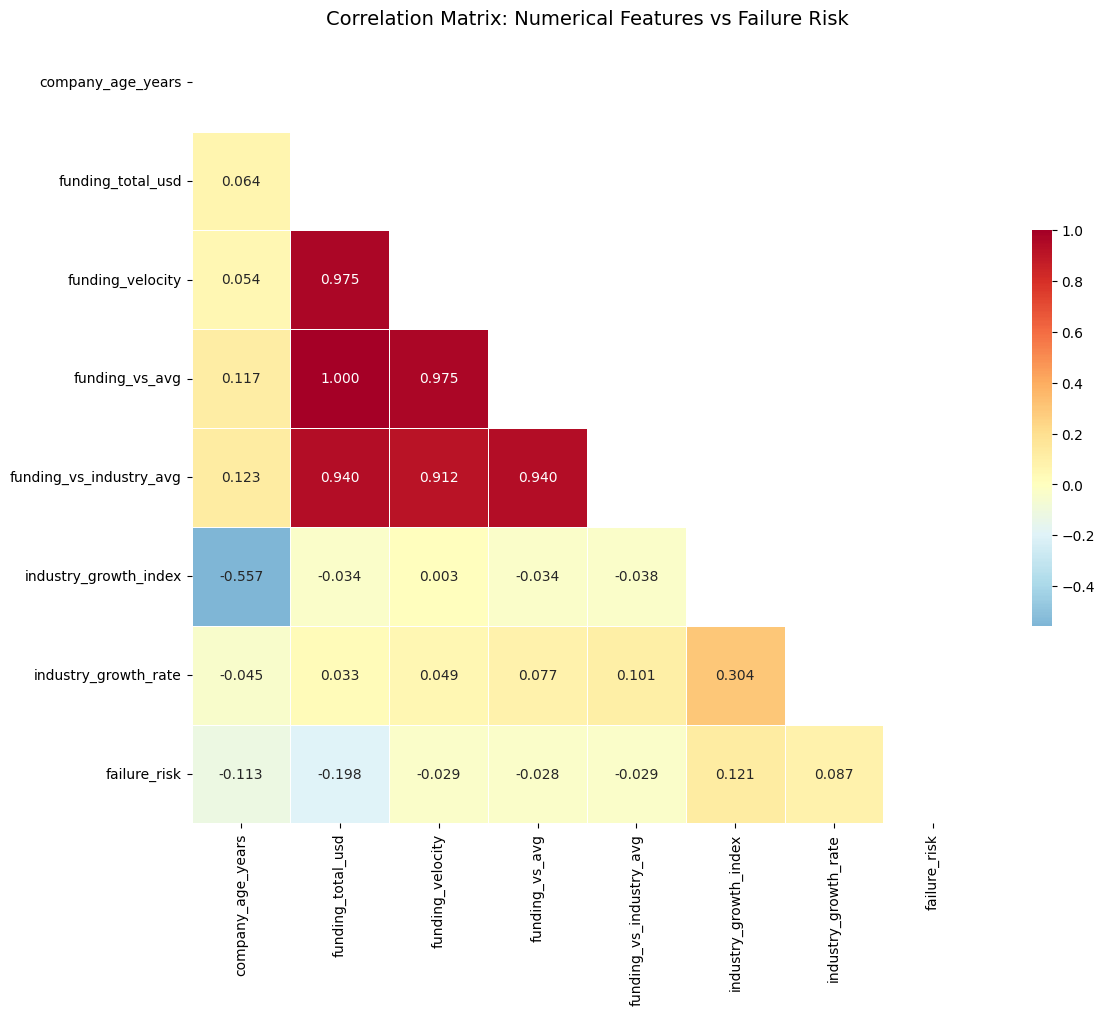

Correlations with Failure Risk (sorted by absolute value):
funding_total_usd        : -0.198
industry_growth_index    :  0.121
company_age_years        : -0.113
industry_growth_rate     :  0.087
funding_vs_industry_avg  : -0.029
funding_velocity         : -0.029
funding_vs_avg           : -0.028


In [33]:
# Select numerical features for correlation analysis
numerical_features = ['company_age_years', 'funding_total_usd', 'funding_velocity', 
                      'funding_vs_avg', 'funding_vs_industry_avg', 'industry_growth_index', 
                      'industry_growth_rate', 'failure_risk']

correlation_matrix = df[numerical_features].corr()

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdYlBu_r', center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, fmt='.3f')
plt.title('Correlation Matrix: Numerical Features vs Failure Risk', fontsize=14)
plt.tight_layout()
plt.show()

# Show correlations with failure_risk specifically
print("Correlations with Failure Risk (sorted by absolute value):")
failure_risk_corr = correlation_matrix['failure_risk'].drop('failure_risk').sort_values(key=abs, ascending=False)
for feature, corr in failure_risk_corr.items():
    print(f"{feature:25s}: {corr:6.3f}")

### Categorical features by risk tier

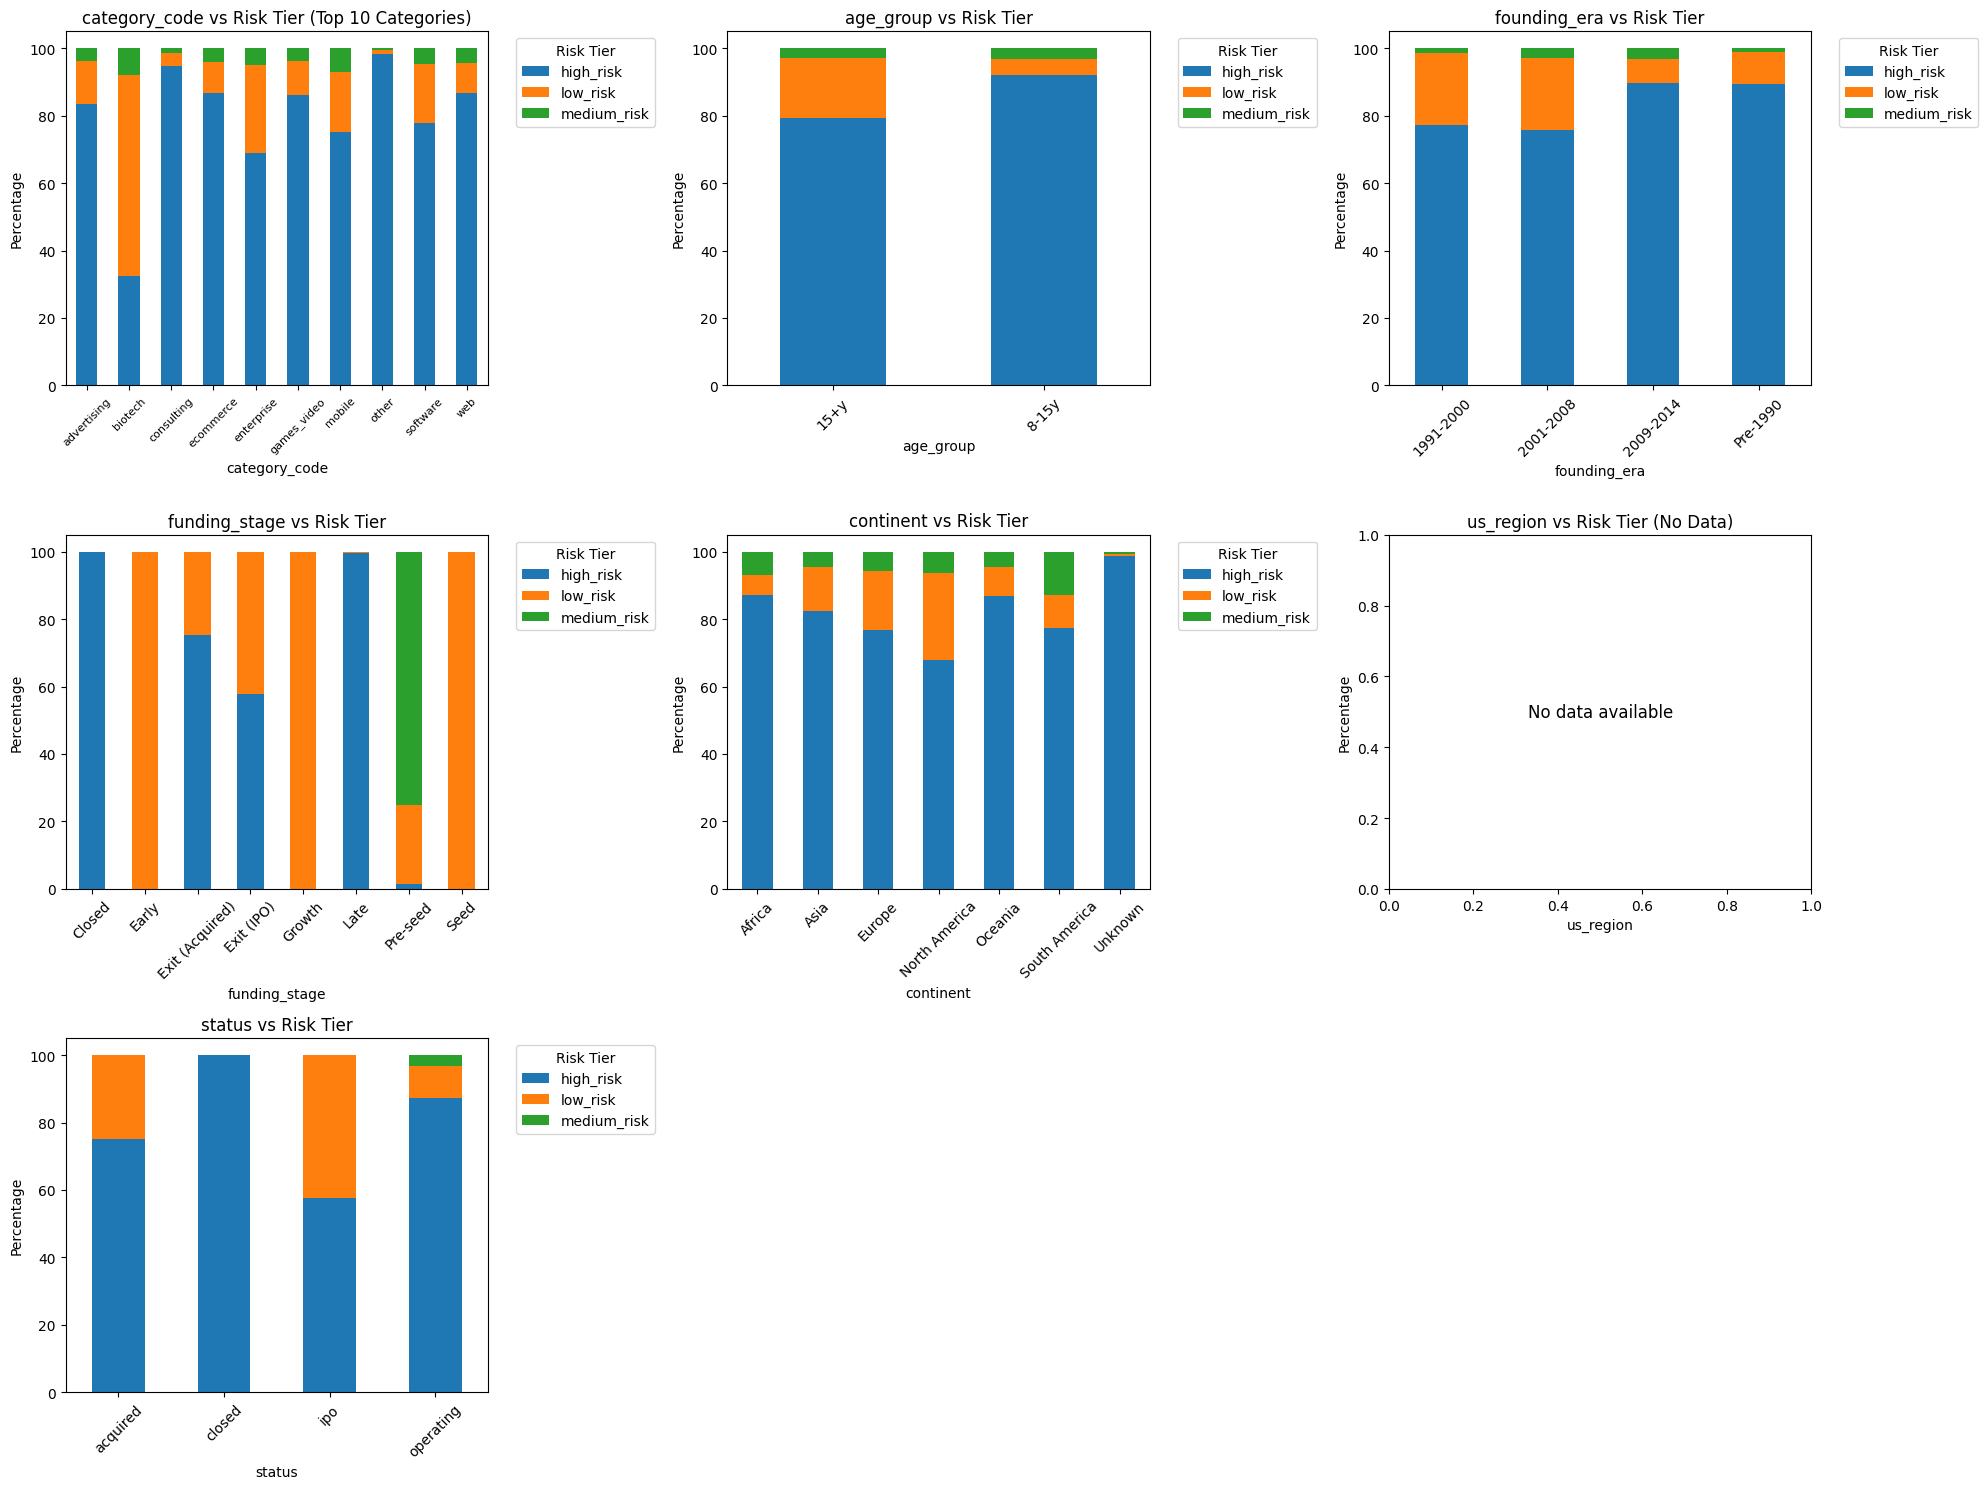

In [34]:
# Analyze categorical features by risk tier
categorical_features = ['category_code', 'age_group', 'founding_era', 'funding_stage', 
                       'continent', 'us_region', 'status']

fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.ravel()

for i, feature in enumerate(categorical_features):
    if i < len(axes):
        if feature == 'category_code':
            # Special handling for category_code - show only top 10 categories
            top_categories = df[feature].value_counts().head(10).index
            df_subset = df[df[feature].isin(top_categories)]
            ct = pd.crosstab(df_subset[feature], df_subset['risk_tier_label'], normalize='index') * 100
            
            ct.plot(kind='bar', ax=axes[i], stacked=True)
            axes[i].set_title(f'{feature} vs Risk Tier (Top 10 Categories)', fontsize=12)
            axes[i].set_xlabel(feature)
            axes[i].set_ylabel('Percentage')
            axes[i].legend(title='Risk Tier', bbox_to_anchor=(1.05, 1), loc='upper left')
            axes[i].tick_params(axis='x', rotation=45, labelsize=8)
        else:
            # Normal handling for other categorical features
            ct = pd.crosstab(df[feature], df['risk_tier_label'], normalize='index') * 100
            
            if not ct.empty and ct.shape[0] > 0:
                ct.plot(kind='bar', ax=axes[i], stacked=True)
                axes[i].set_title(f'{feature} vs Risk Tier', fontsize=12)
                axes[i].set_xlabel(feature)
                axes[i].set_ylabel('Percentage')
                axes[i].legend(title='Risk Tier', bbox_to_anchor=(1.05, 1), loc='upper left')
                axes[i].tick_params(axis='x', rotation=45)
            else:
                axes[i].text(0.5, 0.5, 'No data available', 
                             horizontalalignment='center', verticalalignment='center',
                             transform=axes[i].transAxes, fontsize=12)
                axes[i].set_title(f'{feature} vs Risk Tier (No Data)', fontsize=12)
                axes[i].set_xlabel(feature)
                axes[i].set_ylabel('Percentage')

# Remove empty subplots
for i in range(len(categorical_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [35]:
print("\nCATEGORY_CODE (Top 10 only):")
top_categories = df['category_code'].value_counts().head(10).index
df_subset = df[df['category_code'].isin(top_categories)]
ct_category = pd.crosstab(df_subset['category_code'], df_subset['risk_tier_label'], normalize='index') * 100
print(ct_category.round(2))


CATEGORY_CODE (Top 10 only):
risk_tier_label  high_risk  low_risk  medium_risk
category_code                                    
advertising          83.47     12.82         3.71
biotech              32.53     59.44         8.04
consulting           94.83      3.76         1.42
ecommerce            86.57      9.42         4.01
enterprise           68.79     26.10         5.11
games_video          86.10     10.07         3.83
mobile               75.18     17.81         7.01
other                98.34      1.20         0.46
software             77.86     17.32         4.82
web                  86.68      8.82         4.50


In [36]:
# Age Group Analysis
print("\nAGE_GROUP:")
ct_age = pd.crosstab(df['age_group'], df['risk_tier_label'], normalize='index') * 100
print(ct_age.round(2))


AGE_GROUP:
risk_tier_label  high_risk  low_risk  medium_risk
age_group                                        
15+y                 79.29     17.67         3.04
8-15y                91.98      4.90         3.11


In [37]:
# Founding Era Analysis
print("\nFOUNDING_ERA:")
ct_founding = pd.crosstab(df['founding_era'], df['risk_tier_label'], normalize='index') * 100
print(ct_founding.round(2))


FOUNDING_ERA:
risk_tier_label  high_risk  low_risk  medium_risk
founding_era                                     
1991-2000            77.26     21.43         1.30
2001-2008            75.65     21.42         2.93
2009-2014            89.81      6.92         3.28
Pre-1990             89.29      9.59         1.12


In [38]:
# Funding Stage Analysis
print("\nFUNDING_STAGE:")
ct_funding = pd.crosstab(df['funding_stage'], df['risk_tier_label'], normalize='index') * 100
print(ct_funding.round(2))


FUNDING_STAGE:
risk_tier_label  high_risk  low_risk  medium_risk
funding_stage                                    
Closed              100.00      0.00         0.00
Early                 0.00    100.00         0.00
Exit (Acquired)      75.18     24.82         0.00
Exit (IPO)           57.76     42.24         0.00
Growth                0.00    100.00         0.00
Late                 99.70      0.30         0.00
Pre-seed              1.52     23.29        75.18
Seed                  0.00    100.00         0.00


## Investment Activity Features Analysis

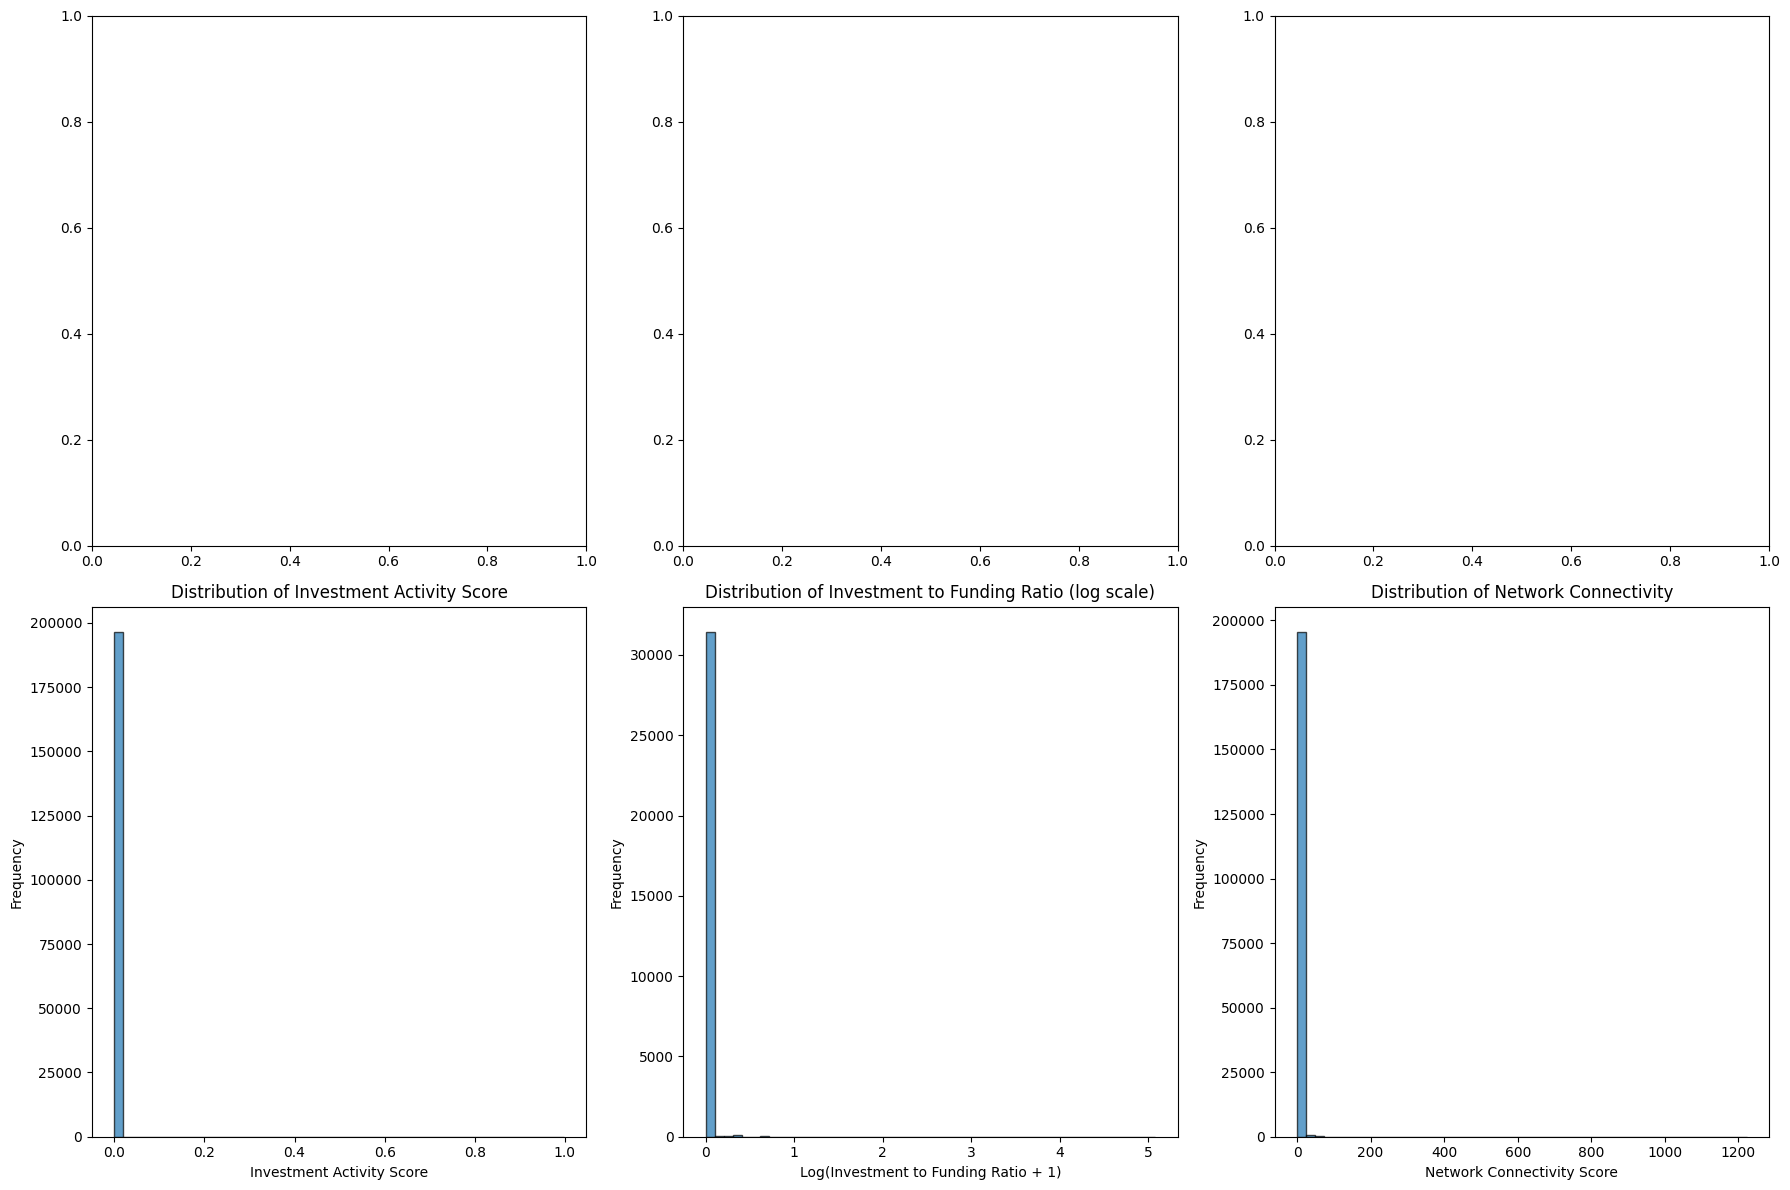

=== INVESTMENT ACTIVITY SUMMARY ===

Investment Activity Score Statistics:
  Mean: 0.0001
  Std: 0.0029
  Max: 0.9979

Network Connectivity Statistics:
  Mean: 1.94
  Std: 8.32
  Max: 1222


In [39]:
# Investment Activity Features Analysis
investment_features = ['is_investor', 'is_investee', 'is_dual_role', 'investment_activity_score', 
                       'investment_to_funding_ratio', 'network_connectivity']

# Distribution of investment types
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

# Investment activity score distribution
axes[3].hist(df['investment_activity_score'], bins=50, alpha=0.7, edgecolor='black')
axes[3].set_title('Distribution of Investment Activity Score')
axes[3].set_xlabel('Investment Activity Score')
axes[3].set_ylabel('Frequency')

# Investment to funding ratio distribution (log scale for better visualization)
df_with_funding = df[df['funding_rounds'] > 0]
axes[4].hist(np.log1p(df_with_funding['investment_to_funding_ratio']), bins=50, alpha=0.7, edgecolor='black')
axes[4].set_title('Distribution of Investment to Funding Ratio (log scale)')
axes[4].set_xlabel('Log(Investment to Funding Ratio + 1)')
axes[4].set_ylabel('Frequency')

# Network connectivity distribution
axes[5].hist(df['network_connectivity'], bins=50, alpha=0.7, edgecolor='black')
axes[5].set_title('Distribution of Network Connectivity')
axes[5].set_xlabel('Network Connectivity Score')
axes[5].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Summary statistics
print("=== INVESTMENT ACTIVITY SUMMARY ===")
print(f"\nInvestment Activity Score Statistics:")
print(f"  Mean: {df['investment_activity_score'].mean():.4f}")
print(f"  Std: {df['investment_activity_score'].std():.4f}")
print(f"  Max: {df['investment_activity_score'].max():.4f}")

print(f"\nNetwork Connectivity Statistics:")
print(f"  Mean: {df['network_connectivity'].mean():.2f}")
print(f"  Std: {df['network_connectivity'].std():.2f}")
print(f"  Max: {df['network_connectivity'].max():.0f}")

## Digital Presence & Branding Features Analysis

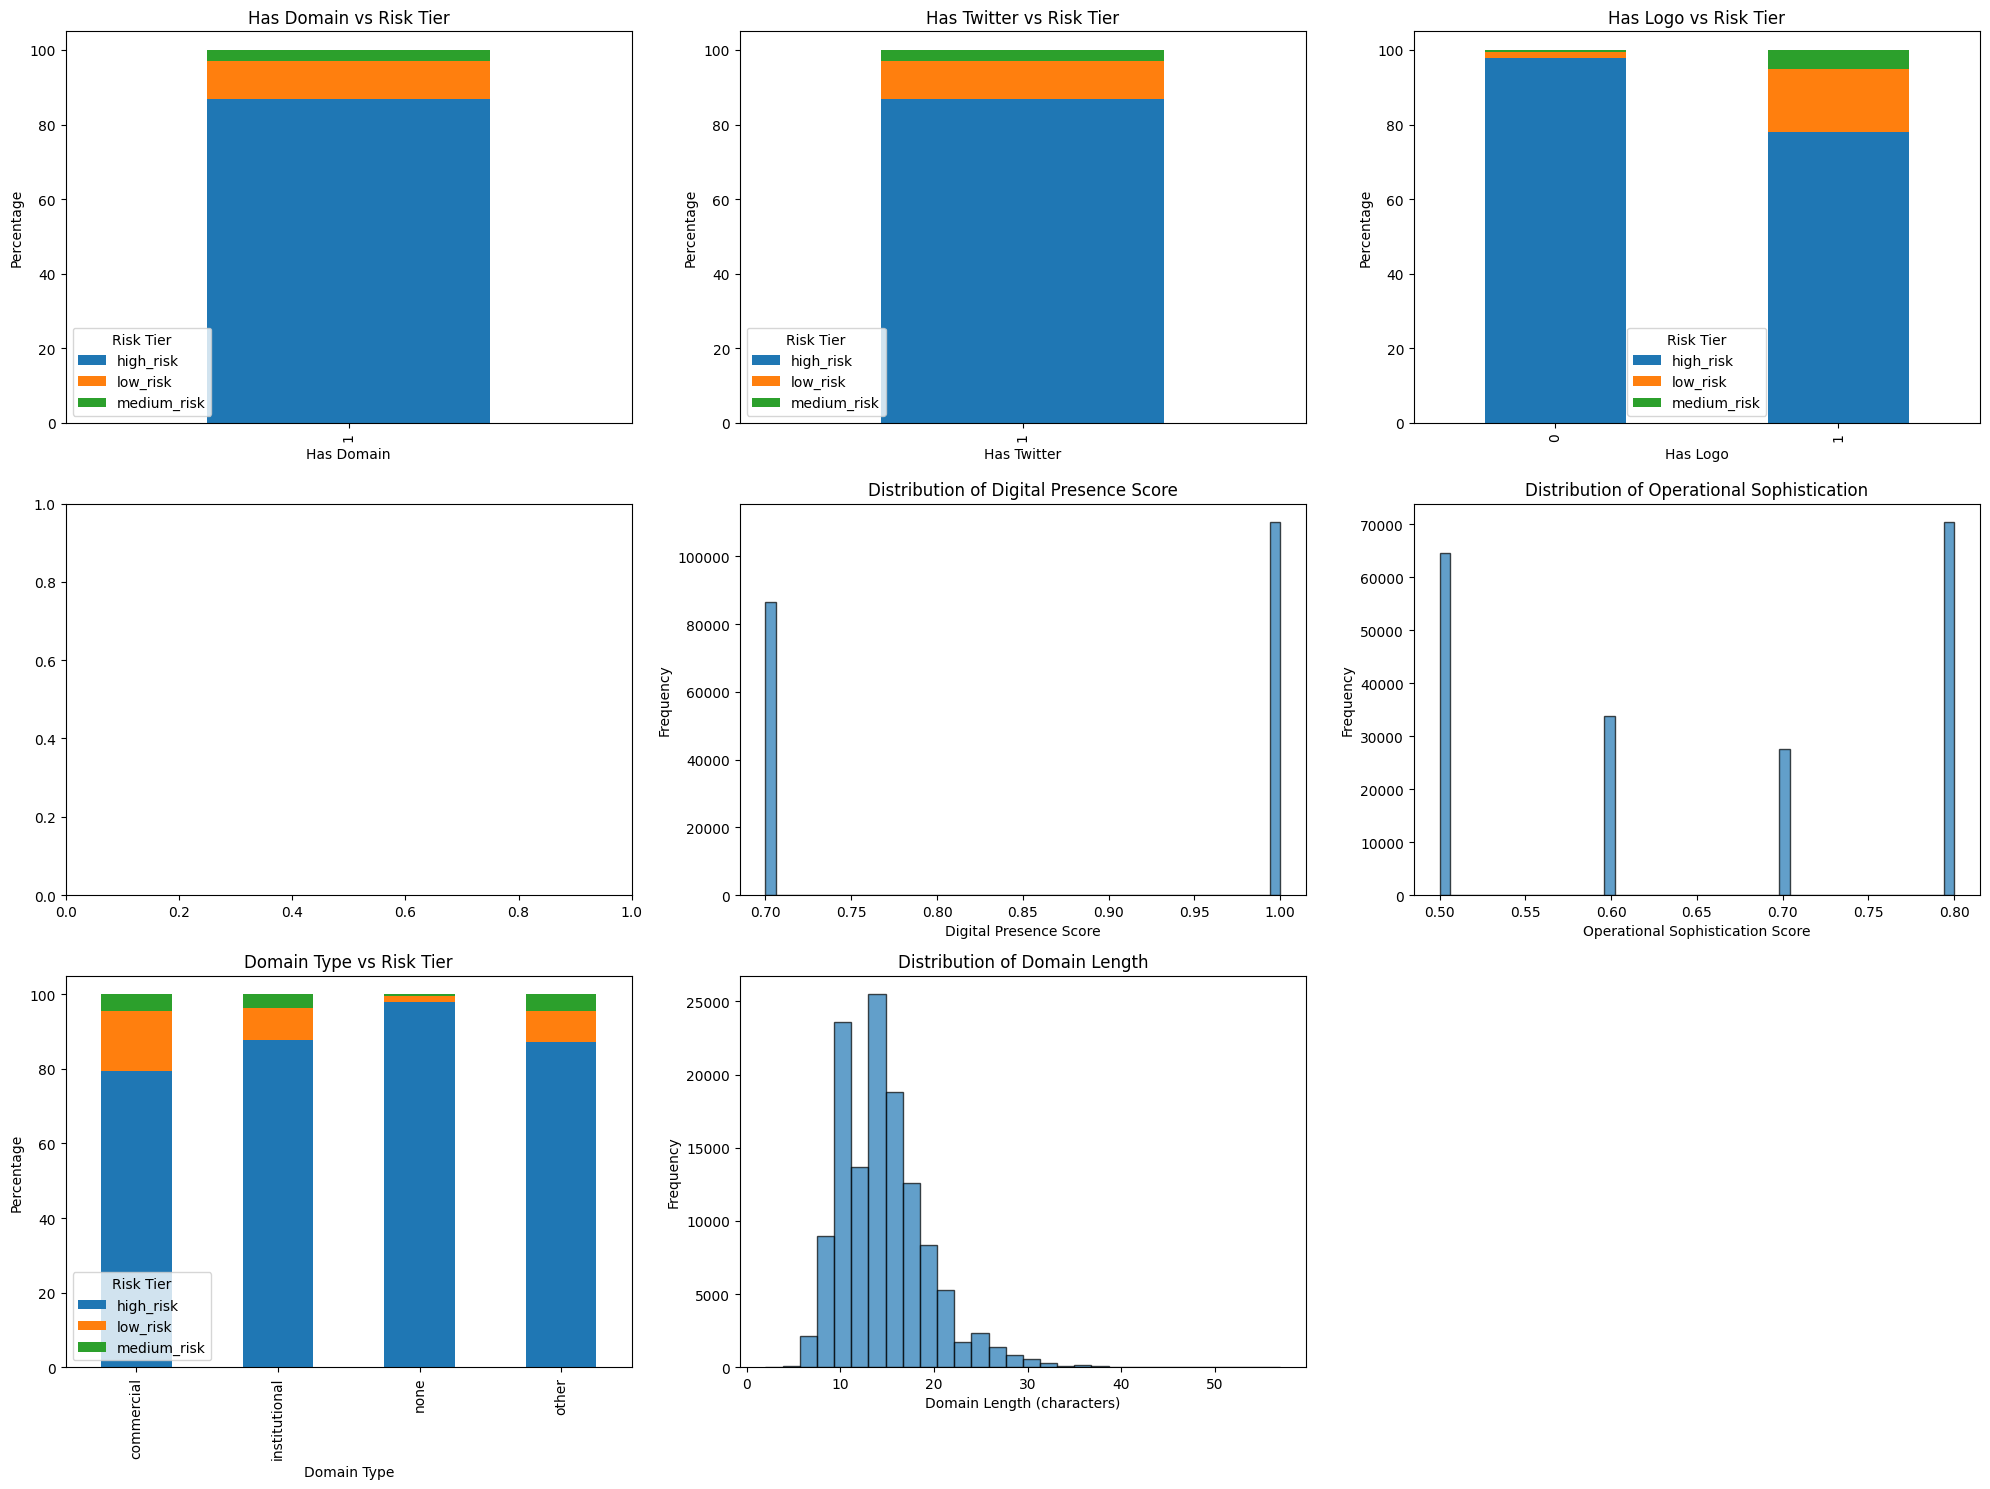

=== DIGITAL PRESENCE SUMMARY ===
Companies with domains: 196,530 (100.0%)
Companies with Twitter: 196,530 (100.0%)
Companies with logos: 110,099 (56.0%)

Digital Presence Score Statistics:
  Mean: 0.868
  Std: 0.149
  Range: 0.7 - 1.0

Domain Type Distribution:
domain_type
commercial       108697
none              69997
other             15556
institutional      2280
Name: count, dtype: int64

=== RISK ANALYSIS BY DIGITAL PRESENCE ===
Has Domain:
  Average risk (Yes): 0.868
  Average risk (No): nan
  Risk difference: nan

Has Twitter:
  Average risk (Yes): 0.868
  Average risk (No): nan
  Risk difference: nan

Has Logo:
  Average risk (Yes): 0.780
  Average risk (No): 0.979
  Risk difference: -0.199

Risk by Domain Type:
                mean   count
domain_type                 
commercial     0.794  108697
institutional  0.877    2280
none           0.981   69997
other          0.872   15556


In [40]:
# Digital Presence & Branding Features Analysis
digital_features = ['has_domain', 'has_twitter', 'has_logo', 'has_custom_logo', 
                    'digital_presence_score', 'operational_sophistication', 'domain_type']

fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.ravel()

# Digital presence binary features
digital_binary = ['has_domain', 'has_twitter', 'has_logo']
for i, feature in enumerate(digital_binary):
    ct = pd.crosstab(df[feature], df['risk_tier_label'], normalize='index') * 100
    ct.plot(kind='bar', ax=axes[i], stacked=True)
    axes[i].set_title(f'{feature.replace("_", " ").title()} vs Risk Tier')
    axes[i].set_xlabel(feature.replace("_", " ").title())
    axes[i].set_ylabel('Percentage')
    axes[i].legend(title='Risk Tier')

# Digital presence score distribution
axes[4].hist(df['digital_presence_score'], bins=50, alpha=0.7, edgecolor='black')
axes[4].set_title('Distribution of Digital Presence Score')
axes[4].set_xlabel('Digital Presence Score')
axes[4].set_ylabel('Frequency')

# Operational sophistication distribution
axes[5].hist(df['operational_sophistication'], bins=50, alpha=0.7, edgecolor='black')
axes[5].set_title('Distribution of Operational Sophistication')
axes[5].set_xlabel('Operational Sophistication Score')
axes[5].set_ylabel('Frequency')

# Domain type vs risk tier
ct_domain = pd.crosstab(df['domain_type'], df['risk_tier_label'], normalize='index') * 100
ct_domain.plot(kind='bar', ax=axes[6], stacked=True)
axes[6].set_title('Domain Type vs Risk Tier')
axes[6].set_xlabel('Domain Type')
axes[6].set_ylabel('Percentage')
axes[6].legend(title='Risk Tier')

# Domain length distribution
axes[7].hist(df[df['domain_length'] > 0]['domain_length'], bins=30, alpha=0.7, edgecolor='black')
axes[7].set_title('Distribution of Domain Length')
axes[7].set_xlabel('Domain Length (characters)')
axes[7].set_ylabel('Frequency')

# Remove empty subplot
fig.delaxes(axes[8])

plt.tight_layout()
plt.show()

# Summary statistics
print("=== DIGITAL PRESENCE SUMMARY ===")
print(f"Companies with domains: {df['has_domain'].sum():,} ({df['has_domain'].mean():.1%})")
print(f"Companies with Twitter: {df['has_twitter'].sum():,} ({df['has_twitter'].mean():.1%})")
print(f"Companies with logos: {df['has_logo'].sum():,} ({df['has_logo'].mean():.1%})")

print(f"\nDigital Presence Score Statistics:")
print(f"  Mean: {df['digital_presence_score'].mean():.3f}")
print(f"  Std: {df['digital_presence_score'].std():.3f}")
print(f"  Range: {df['digital_presence_score'].min():.1f} - {df['digital_presence_score'].max():.1f}")

print(f"\nDomain Type Distribution:")
print(df['domain_type'].value_counts())

# Risk analysis by digital presence
print(f"\n=== RISK ANALYSIS BY DIGITAL PRESENCE ===")
for feature in digital_binary:
    has_feature = df[df[feature] == 1]['failure_risk'].mean()
    no_feature = df[df[feature] == 0]['failure_risk'].mean()
    print(f"{feature.replace('_', ' ').title()}:")
    print(f"  Average risk (Yes): {has_feature:.3f}")
    print(f"  Average risk (No): {no_feature:.3f}")
    print(f"  Risk difference: {has_feature - no_feature:.3f}")
    print()

# Domain type risk analysis
print(f"Risk by Domain Type:")
domain_risk = df.groupby('domain_type')['failure_risk'].agg(['mean', 'count']).round(3)
print(domain_risk)

## Text-based Features (NLP) Analysis

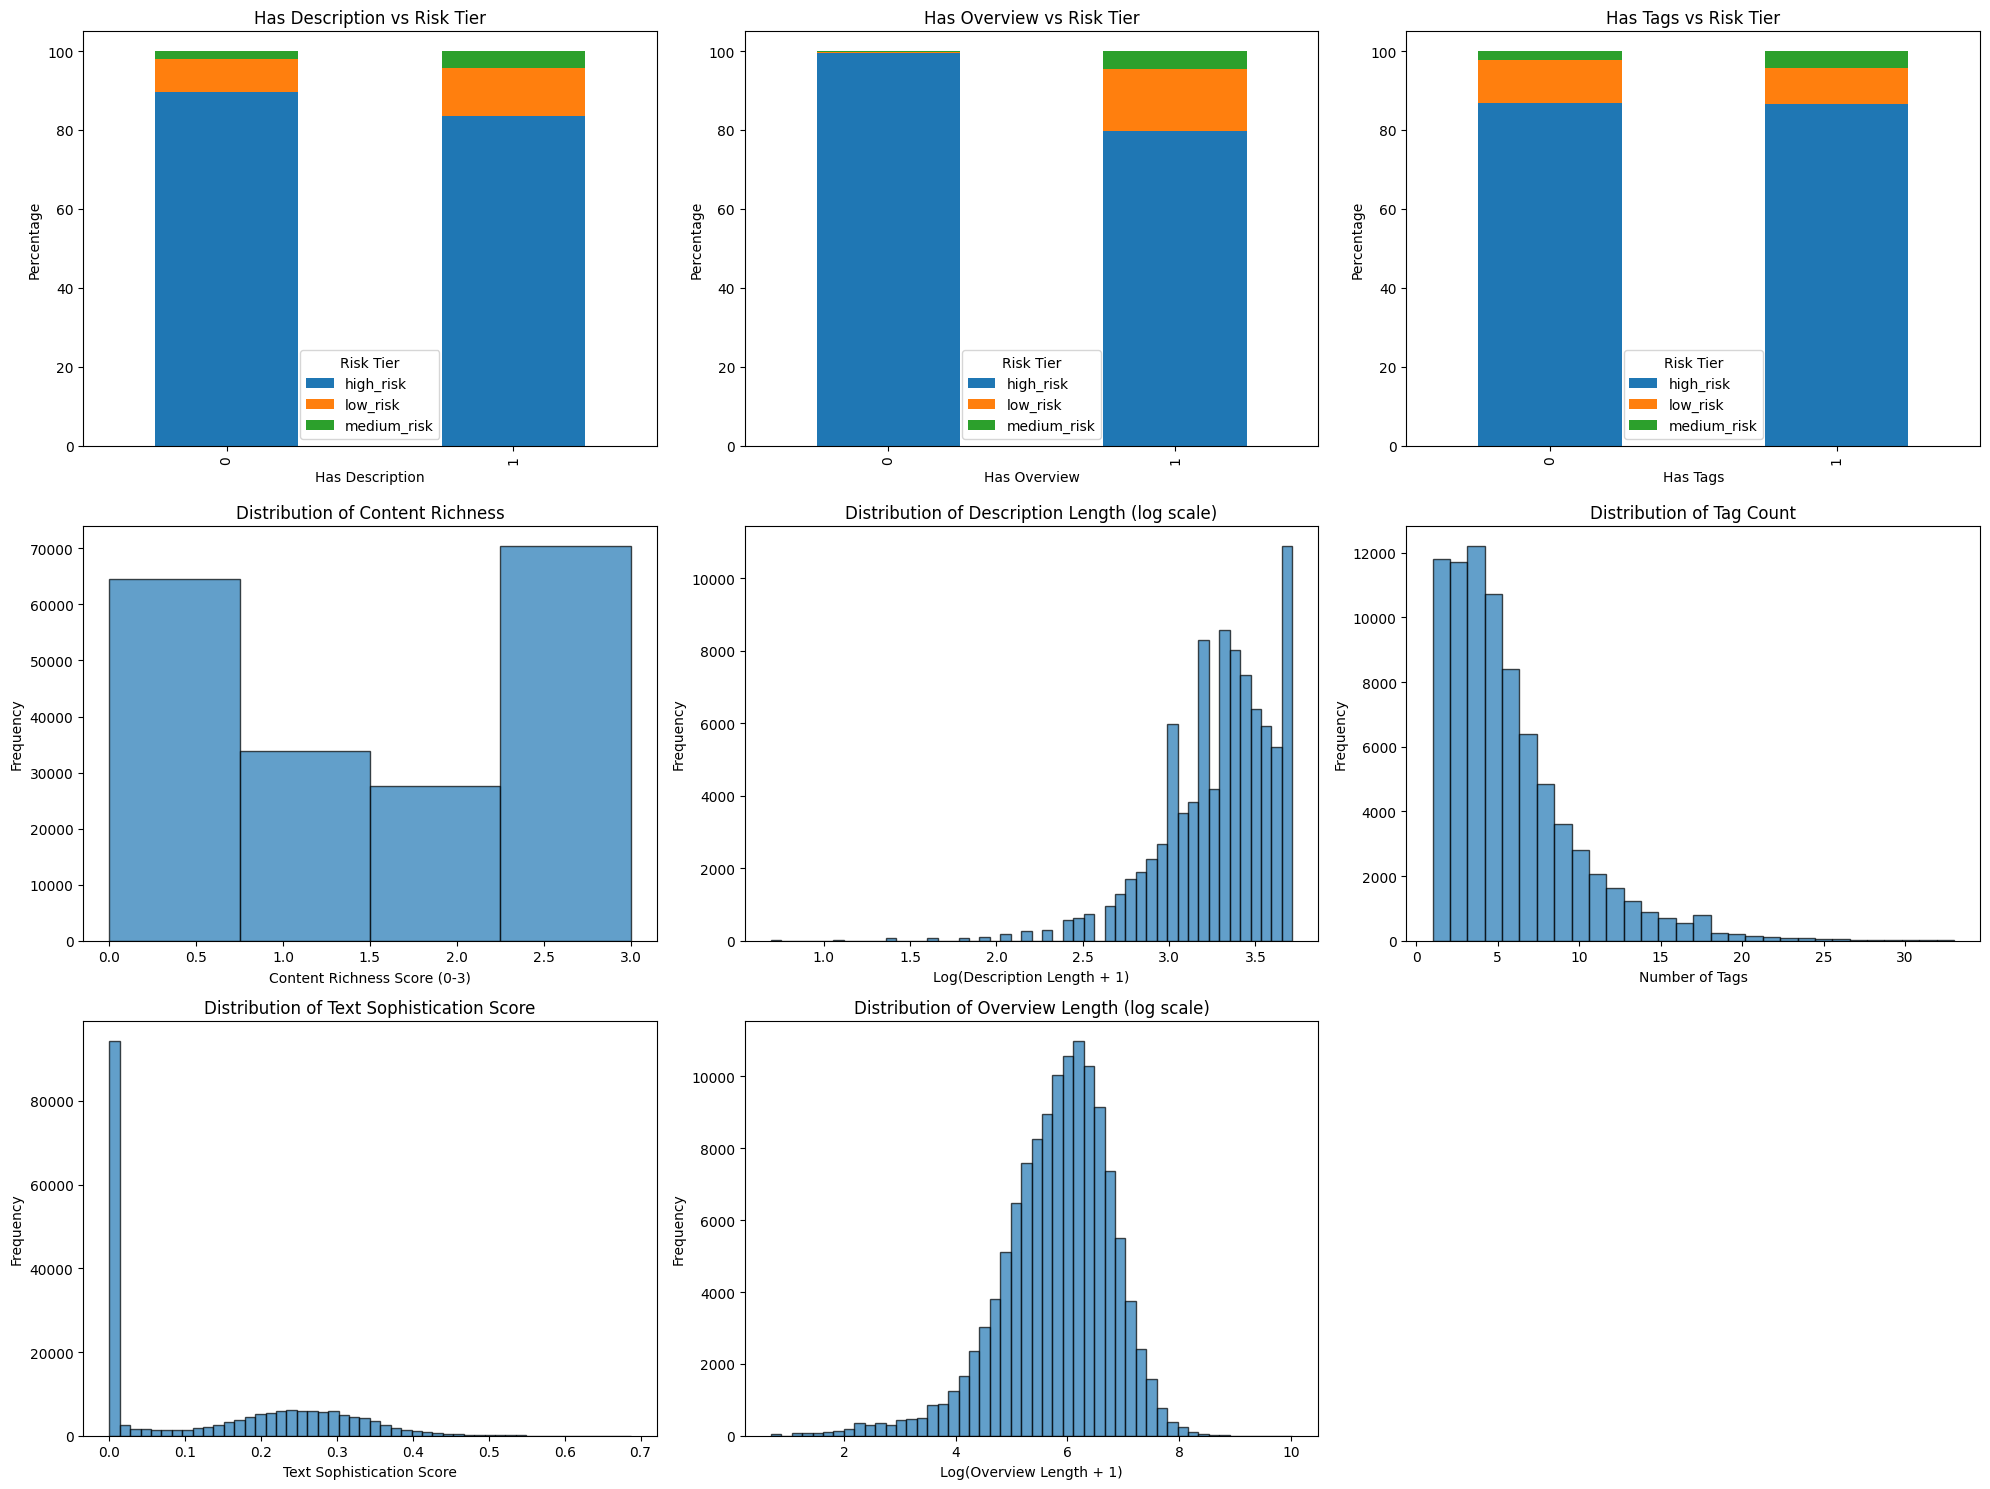

=== TEXT-BASED FEATURES SUMMARY ===
Companies with descriptions: 92,032 (46.8%)
Companies with overviews: 126,965 (64.6%)
Companies with tags: 81,443 (41.4%)

Content Richness Distribution:
  Score 0: 64,572 companies (32.9%)
  Score 1: 33,892 companies (17.2%)
  Score 2: 27,650 companies (14.1%)
  Score 3: 70,416 companies (35.8%)

Text Length Statistics:
  Description length - Mean: 12.7, Max: 40
  Overview length - Mean: 317.0, Max: 22594
  Tag count - Mean: 2.4, Max: 33

Text Sophistication Score:
  Mean: 0.125
  Std: 0.138
  Range: 0.000 - 0.687

=== RISK ANALYSIS BY CONTENT AVAILABILITY ===
Has Description:
  Average risk (Yes): 0.836
  Average risk (No): 0.895
  Risk difference: -0.059

Has Overview:
  Average risk (Yes): 0.797
  Average risk (No): 0.996
  Risk difference: -0.198

Has Tags:
  Average risk (Yes): 0.866
  Average risk (No): 0.869
  Risk difference: -0.003

Risk by Content Richness:
                   mean  count
content_richness              
0                 0.9

In [41]:
# Text-based Features Analysis
text_features = ['has_description', 'has_overview', 'has_tags', 'content_richness', 
                 'description_length', 'overview_length', 'tag_count', 'text_sophistication']

fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.ravel()

# Content availability features
content_binary = ['has_description', 'has_overview', 'has_tags']
for i, feature in enumerate(content_binary):
    ct = pd.crosstab(df[feature], df['risk_tier_label'], normalize='index') * 100
    ct.plot(kind='bar', ax=axes[i], stacked=True)
    axes[i].set_title(f'{feature.replace("_", " ").title()} vs Risk Tier')
    axes[i].set_xlabel(feature.replace("_", " ").title())
    axes[i].set_ylabel('Percentage')
    axes[i].legend(title='Risk Tier')

# Content richness distribution
axes[3].hist(df['content_richness'], bins=4, alpha=0.7, edgecolor='black')
axes[3].set_title('Distribution of Content Richness')
axes[3].set_xlabel('Content Richness Score (0-3)')
axes[3].set_ylabel('Frequency')

# Description length distribution (log scale for better visualization)
desc_with_content = df[df['description_length'] > 0]['description_length']
if len(desc_with_content) > 0:
    axes[4].hist(np.log1p(desc_with_content), bins=50, alpha=0.7, edgecolor='black')
    axes[4].set_title('Distribution of Description Length (log scale)')
    axes[4].set_xlabel('Log(Description Length + 1)')
    axes[4].set_ylabel('Frequency')

# Tag count distribution
tag_with_content = df[df['tag_count'] > 0]['tag_count']
if len(tag_with_content) > 0:
    axes[5].hist(tag_with_content, bins=30, alpha=0.7, edgecolor='black')
    axes[5].set_title('Distribution of Tag Count')
    axes[5].set_xlabel('Number of Tags')
    axes[5].set_ylabel('Frequency')

# Text sophistication distribution
axes[6].hist(df['text_sophistication'], bins=50, alpha=0.7, edgecolor='black')
axes[6].set_title('Distribution of Text Sophistication Score')
axes[6].set_xlabel('Text Sophistication Score')
axes[6].set_ylabel('Frequency')

# Overview length distribution (log scale)
overview_with_content = df[df['overview_length'] > 0]['overview_length']
if len(overview_with_content) > 0:
    axes[7].hist(np.log1p(overview_with_content), bins=50, alpha=0.7, edgecolor='black')
    axes[7].set_title('Distribution of Overview Length (log scale)')
    axes[7].set_xlabel('Log(Overview Length + 1)')
    axes[7].set_ylabel('Frequency')

# Remove empty subplot
fig.delaxes(axes[8])

plt.tight_layout()
plt.show()

# Summary statistics
print("=== TEXT-BASED FEATURES SUMMARY ===")
print(f"Companies with descriptions: {df['has_description'].sum():,} ({df['has_description'].mean():.1%})")
print(f"Companies with overviews: {df['has_overview'].sum():,} ({df['has_overview'].mean():.1%})")
print(f"Companies with tags: {df['has_tags'].sum():,} ({df['has_tags'].mean():.1%})")

print(f"\nContent Richness Distribution:")
content_dist = df['content_richness'].value_counts().sort_index()
for score, count in content_dist.items():
    print(f"  Score {score}: {count:,} companies ({count/len(df):.1%})")

print(f"\nText Length Statistics:")
print(f"  Description length - Mean: {df['description_length'].mean():.1f}, Max: {df['description_length'].max()}")
print(f"  Overview length - Mean: {df['overview_length'].mean():.1f}, Max: {df['overview_length'].max()}")
print(f"  Tag count - Mean: {df['tag_count'].mean():.1f}, Max: {df['tag_count'].max()}")

print(f"\nText Sophistication Score:")
print(f"  Mean: {df['text_sophistication'].mean():.3f}")
print(f"  Std: {df['text_sophistication'].std():.3f}")
print(f"  Range: {df['text_sophistication'].min():.3f} - {df['text_sophistication'].max():.3f}")

# Risk analysis by content availability
print(f"\n=== RISK ANALYSIS BY CONTENT AVAILABILITY ===")
for feature in content_binary:
    has_content = df[df[feature] == 1]['failure_risk'].mean()
    no_content = df[df[feature] == 0]['failure_risk'].mean()
    print(f"{feature.replace('_', ' ').title()}:")
    print(f"  Average risk (Yes): {has_content:.3f}")
    print(f"  Average risk (No): {no_content:.3f}")
    print(f"  Risk difference: {has_content - no_content:.3f}")
    print()

# Content richness vs risk
print(f"Risk by Content Richness:")
richness_risk = df.groupby('content_richness')['failure_risk'].agg(['mean', 'count']).round(3)
print(richness_risk)

## Temporal Features Analysis

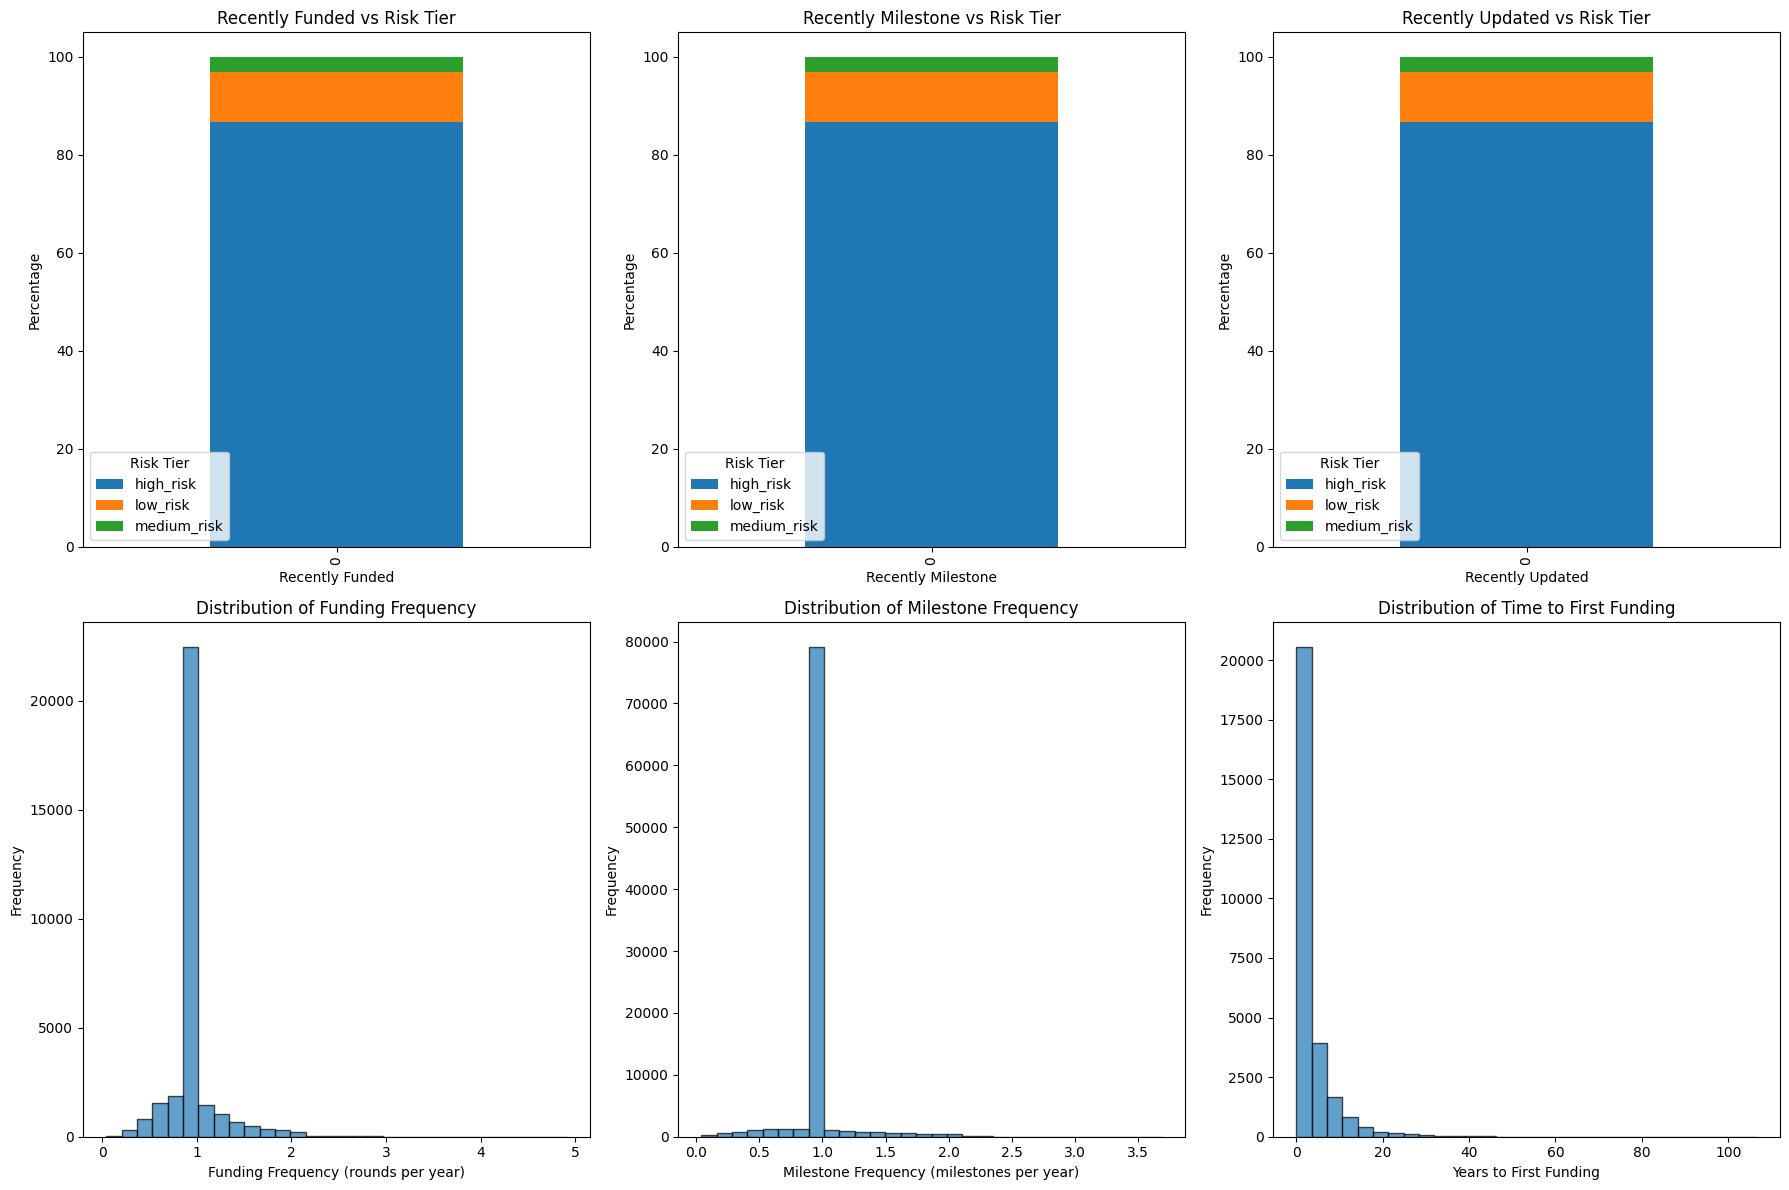

=== TEMPORAL FEATURES SUMMARY ===
Companies recently funded: 0 (0.0%)
Companies with recent milestones: 0 (0.0%)
Companies recently updated: 0 (0.0%)

Funding Frequency Statistics (for funded companies):
  Mean: 1.005 rounds/year
  Median: 1.000 rounds/year
  Max: 4.912 rounds/year

Milestone Frequency Statistics (for companies with milestones):
  Mean: 1.001 milestones/year
  Median: 1.000 milestones/year
  Max: 3.687 milestones/year

Time to First Funding Statistics:
  Mean: 3.4 years
  Median: 1.4 years
  Max: 106.6 years

=== RISK ANALYSIS BY RECENT ACTIVITY ===
Recently Funded:
  Average risk (Yes): nan
  Average risk (No): 0.868
  Risk difference: nan

Recently Milestone:
  Average risk (Yes): nan
  Average risk (No): 0.868
  Risk difference: nan

Recently Updated:
  Average risk (Yes): nan
  Average risk (No): 0.868
  Risk difference: nan



In [42]:
# Temporal Features Analysis
temporal_features = ['recently_funded', 'recently_milestone', 'recently_updated', 
                     'funding_frequency', 'milestone_frequency', 'time_to_first_funding_years']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

# Recent activity features
recent_features = ['recently_funded', 'recently_milestone', 'recently_updated']
for i, feature in enumerate(recent_features):
    ct = pd.crosstab(df[feature], df['risk_tier_label'], normalize='index') * 100
    ct.plot(kind='bar', ax=axes[i], stacked=True)
    axes[i].set_title(f'{feature.replace("_", " ").title()} vs Risk Tier')
    axes[i].set_xlabel(feature.replace("_", " ").title())
    axes[i].set_ylabel('Percentage')
    axes[i].legend(title='Risk Tier')

# Funding frequency distribution (for companies with funding)
funded_companies = df[df['funding_rounds'] > 0]
if len(funded_companies) > 0:
    axes[3].hist(funded_companies['funding_frequency'], bins=30, alpha=0.7, edgecolor='black')
    axes[3].set_title('Distribution of Funding Frequency')
    axes[3].set_xlabel('Funding Frequency (rounds per year)')
    axes[3].set_ylabel('Frequency')

# Milestone frequency distribution (for companies with milestones)
milestone_companies = df[df['milestones'] > 0]
if len(milestone_companies) > 0:
    axes[4].hist(milestone_companies['milestone_frequency'], bins=30, alpha=0.7, edgecolor='black')
    axes[4].set_title('Distribution of Milestone Frequency')
    axes[4].set_xlabel('Milestone Frequency (milestones per year)')
    axes[4].set_ylabel('Frequency')

# Time to first funding distribution (for companies with funding)
funding_time = df[df['time_to_first_funding_years'].notna() & (df['time_to_first_funding_years'] >= 0)]
if len(funding_time) > 0:
    axes[5].hist(funding_time['time_to_first_funding_years'], bins=30, alpha=0.7, edgecolor='black')
    axes[5].set_title('Distribution of Time to First Funding')
    axes[5].set_xlabel('Years to First Funding')
    axes[5].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Summary statistics
print("=== TEMPORAL FEATURES SUMMARY ===")
print(f"Companies recently funded: {df['recently_funded'].sum():,} ({df['recently_funded'].mean():.1%})")
print(f"Companies with recent milestones: {df['recently_milestone'].sum():,} ({df['recently_milestone'].mean():.1%})")
print(f"Companies recently updated: {df['recently_updated'].sum():,} ({df['recently_updated'].mean():.1%})")

if len(funded_companies) > 0:
    print(f"\nFunding Frequency Statistics (for funded companies):")
    print(f"  Mean: {funded_companies['funding_frequency'].mean():.3f} rounds/year")
    print(f"  Median: {funded_companies['funding_frequency'].median():.3f} rounds/year")
    print(f"  Max: {funded_companies['funding_frequency'].max():.3f} rounds/year")

if len(milestone_companies) > 0:
    print(f"\nMilestone Frequency Statistics (for companies with milestones):")
    print(f"  Mean: {milestone_companies['milestone_frequency'].mean():.3f} milestones/year")
    print(f"  Median: {milestone_companies['milestone_frequency'].median():.3f} milestones/year")
    print(f"  Max: {milestone_companies['milestone_frequency'].max():.3f} milestones/year")

if len(funding_time) > 0:
    print(f"\nTime to First Funding Statistics:")
    print(f"  Mean: {funding_time['time_to_first_funding_years'].mean():.1f} years")
    print(f"  Median: {funding_time['time_to_first_funding_years'].median():.1f} years")
    print(f"  Max: {funding_time['time_to_first_funding_years'].max():.1f} years")

# Risk analysis by recent activity
print(f"\n=== RISK ANALYSIS BY RECENT ACTIVITY ===")
for feature in recent_features:
    recent_activity = df[df[feature] == 1]['failure_risk'].mean()
    no_recent_activity = df[df[feature] == 0]['failure_risk'].mean()
    print(f"{feature.replace('_', ' ').title()}:")
    print(f"  Average risk (Yes): {recent_activity:.3f}")
    print(f"  Average risk (No): {no_recent_activity:.3f}")
    print(f"  Risk difference: {recent_activity - no_recent_activity:.3f}")
    print()

## Composite Business Health Features Analysis

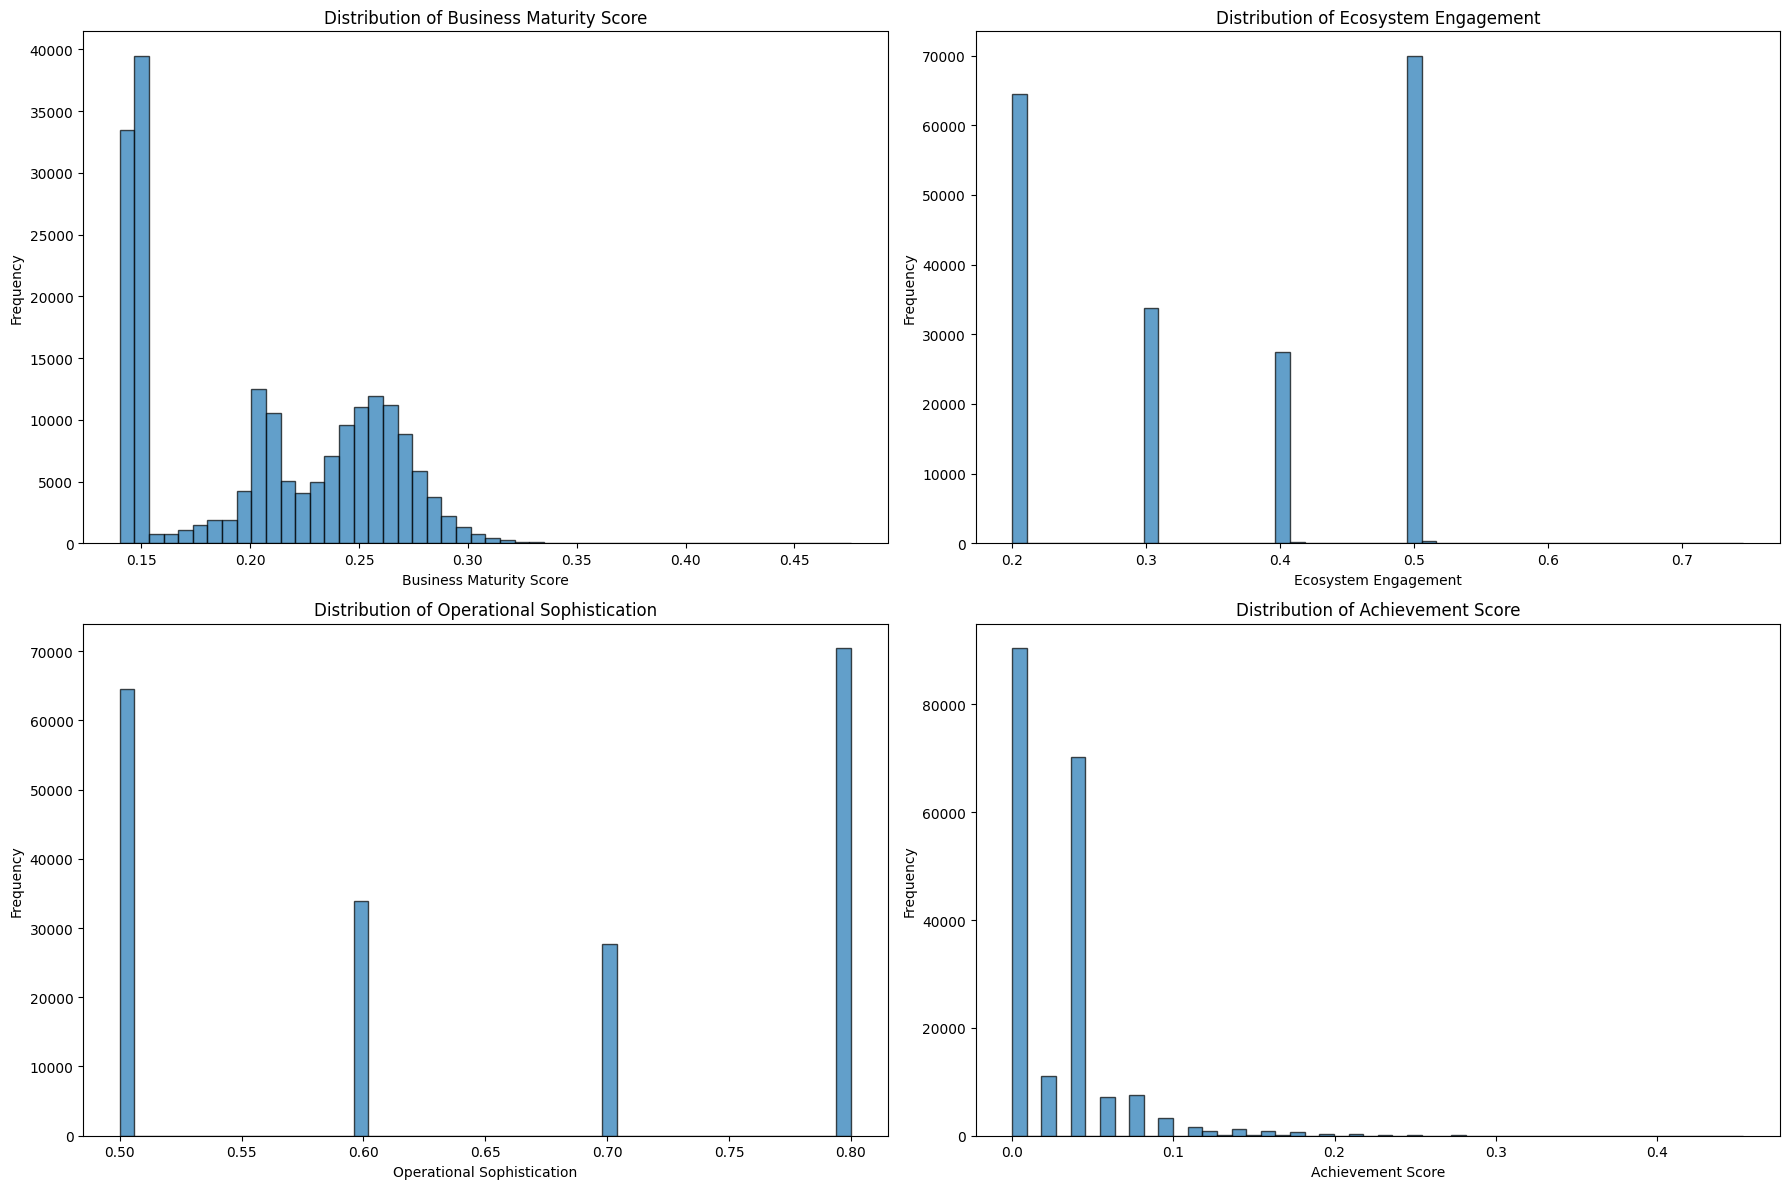

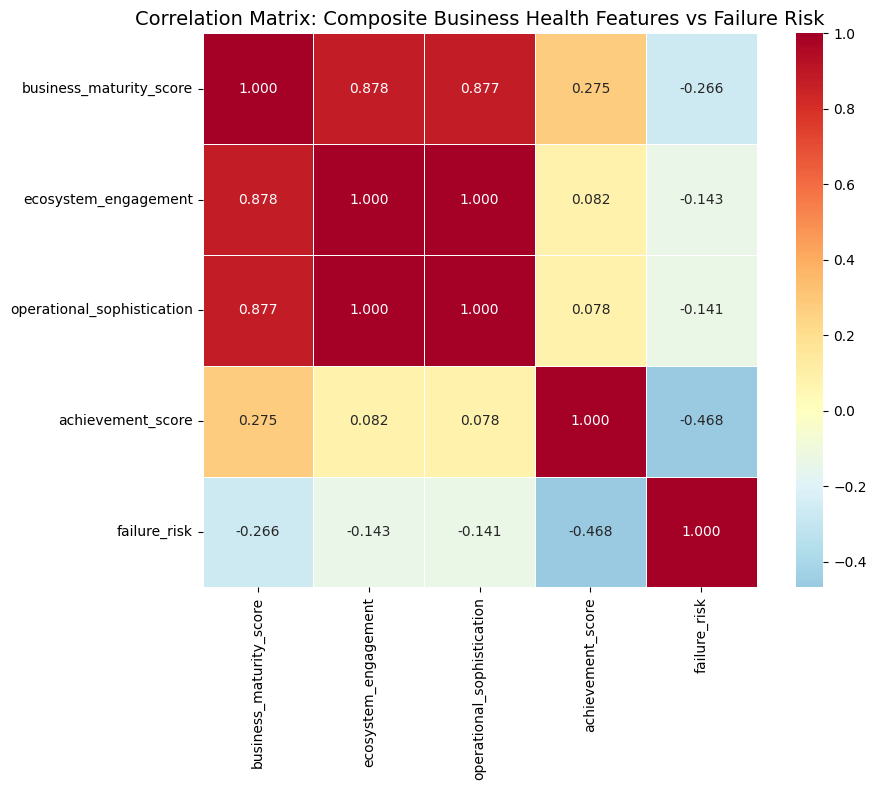

=== COMPOSITE BUSINESS HEALTH SUMMARY ===

Business Maturity Score:
  Mean: 0.204
  Std: 0.052
  Range: 0.140 - 0.476
  Correlation with failure_risk: -0.266

Ecosystem Engagement:
  Mean: 0.353
  Std: 0.127
  Range: 0.200 - 0.746
  Correlation with failure_risk: -0.143

Operational Sophistication:
  Mean: 0.653
  Std: 0.127
  Range: 0.500 - 0.800
  Correlation with failure_risk: -0.141

Achievement Score:
  Mean: 0.027
  Std: 0.035
  Range: 0.000 - 0.454
  Correlation with failure_risk: -0.468

=== RISK ANALYSIS BY COMPOSITE SCORE QUARTILES ===

Business Maturity Score Risk by Quartile:
  Q1: 0.988 (n=71,306)
  Q2: 0.801 (n=59,714)
  Q3: 0.798 (n=65,510)

Ecosystem Engagement Risk by Quartile:
  Q1: 0.967 (n=81,660)
  Q2: 0.805 (n=73,036)
  Q3: 0.785 (n=41,834)

Operational Sophistication does not have enough unique values for quartile analysis.


C:\Users\emily\AppData\Local\Temp\ipykernel_9588\2881569566.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quartile_risk = df.groupby(quartiles)['failure_risk'].mean()
C:\Users\emily\AppData\Local\Temp\ipykernel_9588\2881569566.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quartile_risk = df.groupby(quartiles)['failure_risk'].mean()
C:\Users\emily\AppData\Local\Temp\ipykernel_9588\2881569566.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future


Achievement Score Risk by Quartile:
  Q1: 0.916 (n=101,499)
  Q2: 0.817 (n=95,031)

=== TOP PERFORMERS ANALYSIS (Top 10% by Business Maturity) ===
Top 10% companies (n=19,653):
  Average business maturity score: 0.283
  Average failure risk: 0.686
  Companies with digital presence: 19,652

=== BOTTOM PERFORMERS ANALYSIS (Bottom 10% by Business Maturity) ===
Bottom 10% companies (n=23,363):
  Average business maturity score: 0.140
  Average failure risk: 1.000
  Companies with digital presence: 0


In [43]:
# Composite Business Health Features Analysis
composite_features = ['business_maturity_score', 'ecosystem_engagement', 
                     'operational_sophistication', 'achievement_score']

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.ravel()

# Distribution of composite scores
for i, feature in enumerate(composite_features):
    axes[i].hist(df[feature], bins=50, alpha=0.7, edgecolor='black')
    axes[i].set_title(f'Distribution of {feature.replace("_", " ").title()}')
    axes[i].set_xlabel(feature.replace("_", " ").title())
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Correlation matrix for composite features with failure risk
composite_corr = df[composite_features + ['failure_risk']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(composite_corr, annot=True, cmap='RdYlBu_r', center=0,
            square=True, linewidths=.5, fmt='.3f')
plt.title('Correlation Matrix: Composite Business Health Features vs Failure Risk', fontsize=14)
plt.tight_layout()
plt.show()

# Summary statistics for composite features
print("=== COMPOSITE BUSINESS HEALTH SUMMARY ===")
for feature in composite_features:
    print(f"\n{feature.replace('_', ' ').title()}:")
    print(f"  Mean: {df[feature].mean():.3f}")
    print(f"  Std: {df[feature].std():.3f}")
    print(f"  Range: {df[feature].min():.3f} - {df[feature].max():.3f}")
    print(f"  Correlation with failure_risk: {df[feature].corr(df['failure_risk']):.3f}")

# Risk analysis by composite score quartiles
print(f"\n=== RISK ANALYSIS BY COMPOSITE SCORE QUARTILES ===")
for feature in composite_features:
    bin_result = pd.qcut(df[feature], q=4, duplicates='drop')
    n_bins = len(bin_result.cat.categories) - 1
    if n_bins > 1:
        labels = [f"Q{i+1}" for i in range(n_bins)]
        quartiles = pd.qcut(df[feature], q=n_bins, labels=labels, duplicates='drop')
        quartile_risk = df.groupby(quartiles)['failure_risk'].mean()
        
        print(f"\n{feature.replace('_', ' ').title()} Risk by Quartile:")
        for quartile, risk in quartile_risk.items():
            count = (quartiles == quartile).sum()
            print(f"  {quartile}: {risk:.3f} (n={count:,})")
    else:
        print(f"\n{feature.replace('_', ' ').title()} does not have enough unique values for quartile analysis.")

# Top performers analysis
print(f"\n=== TOP PERFORMERS ANALYSIS (Top 10% by Business Maturity) ===")
top_maturity_threshold = df['business_maturity_score'].quantile(0.9)
top_performers = df[df['business_maturity_score'] >= top_maturity_threshold]

print(f"Top 10% companies (n={len(top_performers):,}):")
print(f"  Average business maturity score: {top_performers['business_maturity_score'].mean():.3f}")
print(f"  Average failure risk: {top_performers['failure_risk'].mean():.3f}")
print(f"  Companies with digital presence: {(top_performers['digital_presence_score'] > 0.7).sum():,}")

# Bottom performers analysis
print(f"\n=== BOTTOM PERFORMERS ANALYSIS (Bottom 10% by Business Maturity) ===")
bottom_maturity_threshold = df['business_maturity_score'].quantile(0.1)
bottom_performers = df[df['business_maturity_score'] <= bottom_maturity_threshold]

print(f"Bottom 10% companies (n={len(bottom_performers):,}):")
print(f"  Average business maturity score: {bottom_performers['business_maturity_score'].mean():.3f}")
print(f"  Average failure risk: {bottom_performers['failure_risk'].mean():.3f}")
print(f"  Companies with digital presence: {(bottom_performers['digital_presence_score'] > 0.7).sum():,}")

## 6. Comprehensive Correlation Analysis of New Features

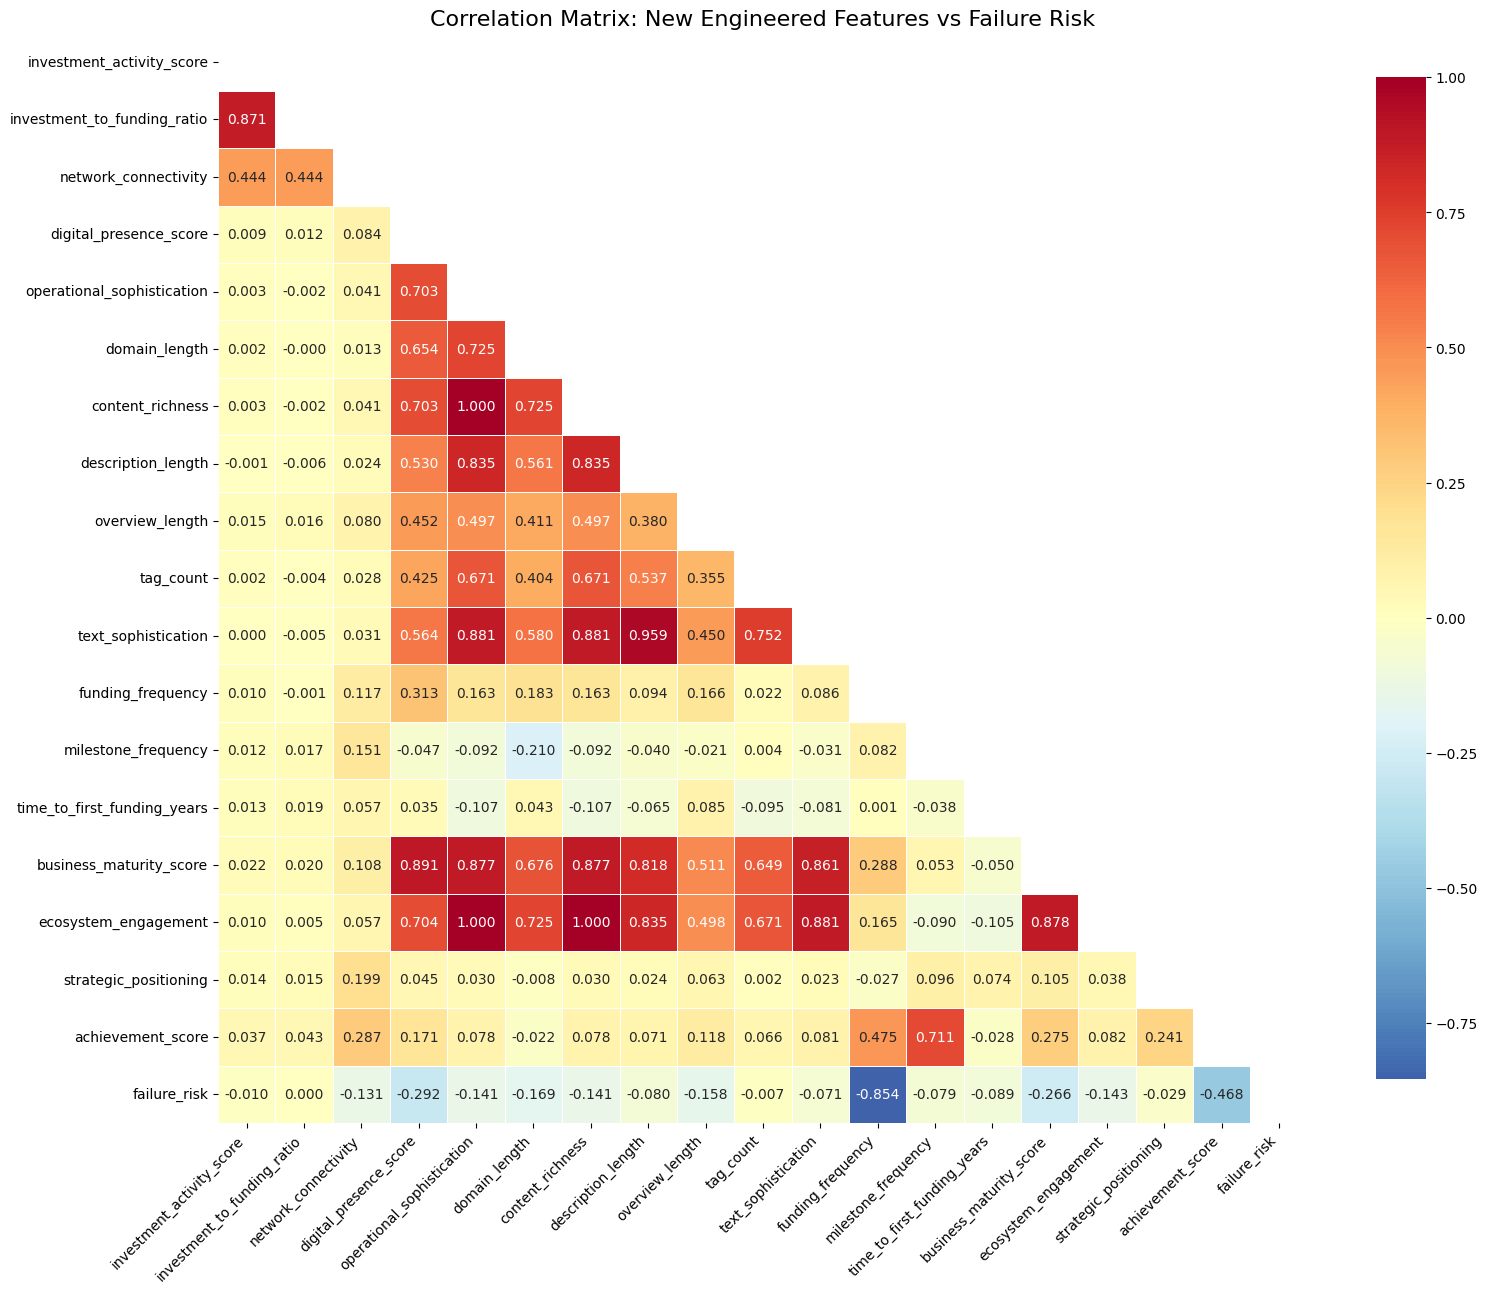

=== CORRELATIONS WITH FAILURE RISK (New Features) ===
Strongest correlations with failure risk:
funding_frequency             :  -0.854 (Strong - ↓ Lower risk)
achievement_score             :  -0.468 (Strong - ↓ Lower risk)
digital_presence_score        :  -0.292 (Moderate - ↓ Lower risk)
business_maturity_score       :  -0.266 (Moderate - ↓ Lower risk)
domain_length                 :  -0.169 (Moderate - ↓ Lower risk)
overview_length               :  -0.158 (Moderate - ↓ Lower risk)
ecosystem_engagement          :  -0.143 (Moderate - ↓ Lower risk)
operational_sophistication    :  -0.141 (Moderate - ↓ Lower risk)
content_richness              :  -0.141 (Moderate - ↓ Lower risk)
network_connectivity          :  -0.131 (Moderate - ↓ Lower risk)
time_to_first_funding_years   :  -0.089 (Weak - ↓ Lower risk)
description_length            :  -0.080 (Weak - ↓ Lower risk)
milestone_frequency           :  -0.079 (Weak - ↓ Lower risk)
text_sophistication           :  -0.071 (Weak - ↓ Lower risk)


In [44]:
# Comprehensive Correlation Analysis of New Features
new_numerical_features = [
    'investment_activity_score', 'investment_to_funding_ratio', 'network_connectivity',
    'digital_presence_score', 'operational_sophistication', 'domain_length',
    'content_richness', 'description_length', 'overview_length', 'tag_count', 'text_sophistication',
    'funding_frequency', 'milestone_frequency', 'time_to_first_funding_years',
    'business_maturity_score', 'ecosystem_engagement', 'strategic_positioning', 'achievement_score',
    'milestone_density',
    'failure_risk'
]

# Filter to available features and create correlation matrix
available_features = [feat for feat in new_numerical_features if feat in df.columns]
new_features_corr = df[available_features].corr()

# Create correlation heatmap
plt.figure(figsize=(16, 14))
mask = np.triu(np.ones_like(new_features_corr, dtype=bool))
sns.heatmap(new_features_corr, mask=mask, annot=True, cmap='RdYlBu_r', center=0,
            square=True, linewidths=.5, fmt='.3f', cbar_kws={"shrink": .8})
plt.title('Correlation Matrix: New Engineered Features vs Failure Risk', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Show correlations with failure_risk specifically, sorted by absolute value
print("=== CORRELATIONS WITH FAILURE RISK (New Features) ===")
new_failure_risk_corr = new_features_corr['failure_risk'].drop('failure_risk').sort_values(key=abs, ascending=False)

print("Strongest correlations with failure risk:")
for feature, corr in new_failure_risk_corr.items():
    direction = "↑ Higher" if corr > 0 else "↓ Lower"
    strength = "Strong" if abs(corr) > 0.3 else "Moderate" if abs(corr) > 0.1 else "Weak"
    print(f"{feature:30s}: {corr:7.3f} ({strength} - {direction} risk)")

# Feature importance ranking
print(f"\n=== TOP 10 NEW FEATURES BY CORRELATION WITH FAILURE RISK ===")
top_corr_features = new_failure_risk_corr.head(10)
for i, (feature, corr) in enumerate(top_corr_features.items(), 1):
    print(f"{i:2d}. {feature:30s}: {corr:7.3f}")

# Feature categories performance summary
print(f"\n=== FEATURE CATEGORY PERFORMANCE SUMMARY ===")

# Calculate average absolute correlation by category
categories = {
    'Investment Activity': ['investment_activity_score', 'investment_to_funding_ratio', 'network_connectivity'],
    'Digital Presence': ['digital_presence_score', 'operational_sophistication'],
    'Text Features': ['content_richness', 'text_sophistication', 'tag_count'],
    'Temporal Features': ['funding_frequency', 'milestone_frequency'],
    'Composite Features': ['business_maturity_score', 'ecosystem_engagement', 'strategic_positioning', 'achievement_score']
}

category_scores = {}
for category, features in categories.items():
    available_cat_features = [f for f in features if f in new_failure_risk_corr.index]
    if available_cat_features:
        avg_abs_corr = abs(new_failure_risk_corr[available_cat_features]).mean()
        category_scores[category] = avg_abs_corr
        print(f"{category:20s}: {avg_abs_corr:.3f} (avg absolute correlation)")

# Rank categories by predictive power
print(f"\n=== FEATURE CATEGORY RANKING ===")
sorted_categories = sorted(category_scores.items(), key=lambda x: x[1], reverse=True)
for i, (category, score) in enumerate(sorted_categories, 1):
    print(f"{i}. {category:20s}: {score:.3f}")

# Multi-collinearity check
print(f"\n=== MULTI-COLLINEARITY CHECK ===")
print("High correlations between new features (|correlation| > 0.7):")
n_features = len(available_features) - 1  # Exclude failure_risk
high_corr_pairs = []

for i in range(n_features):
    for j in range(i+1, n_features):
        corr = new_features_corr.iloc[i, j]
        if abs(corr) > 0.7:
            feature1 = new_features_corr.index[i]
            feature2 = new_features_corr.index[j]
            high_corr_pairs.append((feature1, feature2, corr))

if high_corr_pairs:
    for feature1, feature2, corr in high_corr_pairs:
        print(f"  {feature1} ↔ {feature2}: {corr:.3f}")
else:
    print("  No high correlations found (good for model diversity!)")

print(f"\nTotal new numerical features analyzed: {len(available_features)-1}")
print(f"Features with moderate+ correlation (|r| > 0.1): {sum(abs(corr) > 0.1 for corr in new_failure_risk_corr)}")
print(f"Features with strong correlation (|r| > 0.3): {sum(abs(corr) > 0.3 for corr in new_failure_risk_corr)}")

# 7.1 Under-Capitalized Population Identification & Characteristics

## Step 1: Population Threshold Calculation & Segmentation

```
ALGORITHM: Under-Capitalized Population Identification
1. Calculate 2% VC funding threshold:
   - total_vc_funding = sum(df['funding_total_usd'])
   - threshold_2_percent = total_vc_funding * 0.02
   - percentile_threshold = df['funding_total_usd'].quantile(0.98)

2. Population Segmentation:
   - under_cap_mask = df['funding_total_usd'] <= threshold_2_percent
   - under_cap_companies = df[under_cap_mask]
   - well_funded_companies = df[~under_cap_mask]

EXPECTED OUTPUT:
- Under-cap population: "X,XXX companies (XX.X%)"
- Well-funded population: "X,XXX companies (X.X%)"
- Threshold value: "$X.XX million"
```

## Step 2: Demographic & Distribution Analysis

```
ALGORITHM: Under-Cap Population Characteristics
1. Geographic Distribution Analysis:
   - Compare continent/country/state distribution by funding group
   - Calculate under-cap concentration by region
   - Identify geographic hotspots for bootstrap companies

2. Industry & Stage Distribution:
   - Industry sector analysis by funding group
   - Funding stage distribution comparison
   - Company age distribution analysis

EXPECTED OUTPUT:
- Geographic concentration heatmap data
- Industry distribution comparison charts
- Stage and age demographic breakdowns
- Regional bootstrap opportunity identification
```

# 7.2 Industry Sector Growth Rates Analysis

## Step 1: Temporal Industry Growth Calculation


```
ALGORITHM: Industry Growth Rate Analysis
1. Year-over-Year Growth Metrics:
   - Group companies by [category_code, founded_year]
   - Calculate company formation growth rate by industry
   - Calculate funding growth rate by industry over time

2. Growth Rate Calculations:
   - cagr_companies = compound_annual_growth_rate(company_count by year)
   - cagr_funding = compound_annual_growth_rate(total_funding by year)
   - growth_acceleration = recent_3yr_growth - historical_avg_growth

EXPECTED OUTPUT:
- Industry CAGR rankings: "Top growth sectors"
- Emerging vs declining industry identification
- Growth acceleration trends by sector
```

## Step 2: Under-Cap Opportunity Matrix Development

```
ALGORITHM: Under-Cap Industry Opportunity Analysis
1. Opportunity Score Calculation:
   - undercap_success_rate = success_rate for under-cap companies by industry
   - market_growth_rate = industry CAGR from step 1
   - opportunity_score = growth_rate * undercap_success_rate * (1 - vc_penetration)

2. Market Gap Identification:
   - High growth + Low VC penetration + High under-cap success
   - Calculate funding concentration (HHI) by industry
   - Identify underserved high-potential sectors

EXPECTED OUTPUT:
- Industry opportunity matrix: "Growth vs Under-cap Success"
- Market gap analysis: "Underserved high-growth sectors"
- Investment opportunity rankings for bootstrap companies
```

# 7.3 Success/Failure Proxy Analysis

## Step 1: Success Proxy Definition & Validation

```
ALGORITHM: Success Proxy Development
1. Traditional Success Indicators:
   - exit_success = (status == 'acquired') | (status == 'ipo')
   - funding_success = (funding_rounds >= 3) | (funding_velocity > industry_median)
   - growth_success = strong digital presence + operational sophistication

2. Bootstrap-Specific Success Indicators:
   - bootstrap_efficiency = (milestones + achievements) / (funding_total_usd + 1)
   - operational_success = digital_presence + network_connectivity scores
   - market_validation = customer_proxy + geographic_expansion indicators

EXPECTED OUTPUT:
- Validated success proxy definitions
- Bootstrap vs traditional success pattern comparison
- Success proxy performance metrics (precision/recall)
```

## Step 2: Under-Cap Success Pattern Analysis

```
ALGORITHM: Bootstrap Success Pathway Analysis
1. Success Pathway Identification:
   - Analyze successful under-cap companies for common patterns
   - Compare success routes: bootstrap vs funded pathways
   - Identify unique under-cap advantages and strategies

2. Predictive Validation:
   - Test proxy accuracy against known outcomes
   - Calculate success prediction reliability by population
   - Validate consistency across industries and geographies

EXPECTED OUTPUT:
- Bootstrap success pathway flowcharts
- Under-cap vs funded success rate comparisons
- Predictive accuracy validation results
- Hidden champion identification (high success despite low funding)
```

# 7.4 Geographic Heatmap Data Preparation

## Step 1: Multi-Level Geographic Aggregation

```
ALGORITHM: Geographic Data Structure for Dashboard
1. State-Level Aggregations:
   - startup_density = companies_count / state_population
   - undercap_percentage = under_cap_companies / total_companies
   - success_rate = successful_companies / total_companies by state
   - bootstrap_index = under_cap_success_rate / overall_success_rate

2. County-Level Detailed Data:
   - Parse city → county mappings using geocoding
   - Calculate county startup ecosystem maturity
   - Identify startup cluster density hotspots

EXPECTED OUTPUT:
- state_heatmap_data.csv: State metrics with coordinates
- county_heatmap_data.csv: Detailed county-level data
- Geographic coordinate validation: "XX% coverage"
```

## Step 2: Dashboard-Ready Data Export

```
ALGORITHM: Interactive Heatmap Data Preparation
1. Time Series Data for Animation:
   - Monthly/quarterly startup formation trends by geography
   - Historical success rate evolution by region
   - Funding pattern changes over time by location

2. Interactive Feature Data:
   - Drill-down hierarchy: National → State → County → City
   - Filter dimensions: industry, stage, success status, funding level
   - Contextual company lists for each geographic region

EXPECTED OUTPUT:
- GeoJSON files with embedded metrics for mapping
- Time series arrays for heatmap animation
- Hierarchical drill-down navigation data
- Dashboard configuration files for interactive features
```

# 7.5 Feature Importance for ML Analysis

## Step 1: Statistical Feature Importance Ranking

```
ALGORITHM: Multi-Method Feature Importance Analysis
1. Univariate Statistical Tests:
   - correlation_scores = correlation with failure_risk for numerical features
   - chi_square_scores = chi-square tests for categorical features
   - mutual_info_scores = mutual information between features and target
   - anova_f_scores = ANOVA F-statistics for group differences

2. Tree-Based Feature Importance:
   - rf_importance = RandomForest feature_importances_
   - permutation_importance = permutation-based importance scores
   - xgb_importance = XGBoost feature importance rankings

EXPECTED OUTPUT:
- Comprehensive feature importance rankings by method
- Top 50 features for model training identification
- Feature importance consistency analysis across methods
```

## Step 2: Population-Specific Importance Analysis

```
ALGORITHM: Under-Cap vs Well-Funded Feature Differences
1. Population-Specific Analysis:
   - under_cap_importance = feature importance for under-cap companies only
   - well_funded_importance = feature importance for well-funded companies
   - importance_difference = identify unique predictors by population

2. Feature Category Performance:
   - geographic_features_importance = average importance for location features
   - temporal_features_importance = average importance for time-based features
   - composite_features_importance = average importance for engineered features

EXPECTED OUTPUT:
- Population-specific feature rankings
- Unique predictors for bootstrap vs funded companies
- Category-wise feature contribution analysis
- ML model preparation recommendations
```

# 7.6 Class Imbalance Assessment

## Step 1: Imbalance Severity Measurement

```
ALGORITHM: Class Distribution Analysis
1. Target Variable Distribution:
   - risk_tier_distribution = value_counts(risk_tier_label) with percentages
   - binary_success_distribution = success/failure ratio analysis
   - population_imbalance = under_cap vs well_funded class distribution

2. Imbalance Severity Metrics:
   - imbalance_ratio = minority_class / majority_class
   - effective_sample_size = calculate per class sample adequacy
   - geographic_imbalance = class distribution variation by region
   - industry_imbalance = class distribution variation by sector

EXPECTED OUTPUT:
- Class distribution summary: "Success: XX%, Failure: XX%"
- Imbalance severity assessment: "Ratio X.X:1"
- Geographic and industry imbalance analysis
```

## Step 2: Sampling Strategy Development

```
ALGORITHM: Imbalance Mitigation Strategy Design
1. Resampling Technique Selection:
   - oversampling_candidates = SMOTE, ADASYN, BorderlineSMOTE
   - undersampling_candidates = RandomUnderSampler, TomekLinks
   - hybrid_approaches = combination strategies for optimal balance

2. Evaluation Framework Adaptation:
   - imbalanced_metrics = precision, recall, F1, AUC-ROC, AUC-PR
   - class_weights = calculate inverse frequency weights
   - threshold_optimization = ROC/PR curve analysis for decision boundaries

EXPECTED OUTPUT:
- Recommended sampling strategies by use case
- Imbalance-aware evaluation metric framework
- Class weight and threshold optimization recommendations
```

# 7.7 Bias/Fairness Analysis

## Step 1: Protected Attribute Bias Detection

```
ALGORITHM: Systematic Bias Identification
1. Protected Attribute Definition:
   - geographic_groups = state_code, us_region, country_code groupings
   - industry_groups = category_code sector groupings  
   - temporal_groups = founding_era, company age brackets
   - funding_groups = under_cap vs well_funded populations

2. Statistical Parity Analysis:
   - success_rate_by_group = calculate success rates for each protected group
   - parity_difference = max_success_rate - min_success_rate
   - demographic_parity_ratio = min_success_rate / max_success_rate
   - fairness_threshold = identify groups with >10% success rate differences

EXPECTED OUTPUT:
- Protected group success rate analysis
- Statistical parity violation identification
- Geographic and industry bias measurement
```

## Step 2: Intersectionality & Bias Mitigation

```
ALGORITHM: Multi-Dimensional Fairness Analysis
1. Intersectional Bias Analysis:
   - geography_industry_bias = success rates at intersection of location + sector
   - funding_stage_geographic_bias = bias at funding level + location intersection
   - compound_disadvantage = identify groups facing multiple bias dimensions

2. Bias Mitigation Strategy Development:
   - feature_selection_debiasing = remove biased geographic/temporal predictors
   - threshold_optimization_by_group = adjust decision thresholds per protected group
   - fairness_constrained_modeling = incorporate fairness objectives in model training

EXPECTED OUTPUT:
- Intersectional bias identification report
- Multi-dimensional fairness violation analysis
- Comprehensive bias mitigation strategy recommendations
- Fairness monitoring framework for ongoing assessment
```